In [1484]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Problem Statement: How does GDP affect the standard of living?**


These are the libraries required to solve our problem statement
> pandas: A powerful library for data manipulation and analysis. <br>
> numpy: A library for working with arrays, linear algebra, and other mathematical operations. <br>
> matplotlib: A library for creating static, animated, and interactive visualizations. <br>
> seaborn: A statistical data visualization library based on Matplotlib. <br>
> scikit-learn: A library for machine learning in Python, including various models, preprocessing tools, and evaluation metrics.

In [1485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Cleaning the Happiness Index Datasets

In [1486]:
# Read the CSV files into DataFrames
happiness_df2015 = pd.read_csv("/content/drive/MyDrive/SC1015 Mini Project/datasets/2015_happinessindex.csv")
happiness_df2016 = pd.read_csv("/content/drive/MyDrive/SC1015 Mini Project/datasets/2016_happinessindex.csv")
happiness_df2017 = pd.read_csv("/content/drive/MyDrive/SC1015 Mini Project/datasets/2017_happinessindex.csv")
happiness_df2018 = pd.read_csv("/content/drive/MyDrive/SC1015 Mini Project/datasets/2018_happinessindex.csv")
happiness_df2019 = pd.read_csv("/content/drive/MyDrive/SC1015 Mini Project/datasets/2019_happinessindex.csv")

print(happiness_df2015.columns)
print(happiness_df2016.columns)
print(happiness_df2017.columns)
print(happiness_df2018.columns)
print(happiness_df2019.columns)



Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

__From the 5 datasets above, we have observed that, although the context is the same, some of the columns have different names. So, in order to fix that we will rename them using the function .rename().__

In [1487]:
#renaming 2017 dataset
happiness_df2017.rename(columns={
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Happiness.Score': 'Happiness Score',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
    'Dystopia.Residual': 'Dystopia Residual'
}, inplace=True)

#renaming 2018 dataset
happiness_df2018.rename(columns={
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)'
}, inplace=True)

#renaming 2019 dataset
happiness_df2019.rename(columns={
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)'
}, inplace=True)

## Picking out the data we want


__We decided that our group will be using the data that spans from 2015 to 2019, hence we cleaned and filtered out the Happiness Index, GDP and HDI datasets.__

In [1488]:
# Find the intersection of countries in all five CSV files
common_countries = set(happiness_df2015['Country']).intersection(
    happiness_df2016['Country'], happiness_df2017['Country'], happiness_df2018['Country'], happiness_df2019['Country']
)

# Filter each file to keep only common countries
filtered_2015 = happiness_df2015[happiness_df2015['Country'].isin(common_countries)]
filtered_2016 = happiness_df2016[happiness_df2016['Country'].isin(common_countries)]
filtered_2017 = happiness_df2017[happiness_df2017['Country'].isin(common_countries)]
filtered_2018 = happiness_df2018[happiness_df2018['Country'].isin(common_countries)]
filtered_2019 = happiness_df2019[happiness_df2019['Country'].isin(common_countries)]

# Sort the columns by countries
sorted_2015 = filtered_2015.sort_values(by='Country', ascending=True)
sorted_2016 = filtered_2016.sort_values(by='Country', ascending=True)
sorted_2017 = filtered_2017.sort_values(by='Country', ascending=True)
sorted_2018 = filtered_2018.sort_values(by='Country', ascending=True)
sorted_2019 = filtered_2019.sort_values(by='Country', ascending=True)

sorted_2015.set_index('Country', inplace=True)
sorted_2016.set_index('Country', inplace=True)
sorted_2017.set_index('Country', inplace=True)
sorted_2018.set_index('Country', inplace=True)
sorted_2019.set_index('Country', inplace=True)

sorted_2015.head()


,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
Albania,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
Algeria,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
Armenia,Central and Eastern Europe,127,4.350,0.04763,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873


### Cleaning the Human Development Index (HDI) dataset

In [1489]:
# Cleaning Human Development Index (HDI) dataset
HDI = pd.read_csv("/content/drive/MyDrive/SC1015 Mini Project/datasets/human development index.csv")
print(HDI.columns)
print("\n")

# Keep only the columns you want (in this case, only 'Country' and 'year')
HDI = HDI[['Country', '2015','2016', '2017', '2018', '2019']]

# Create dataframes for each year of data
HDI_2015 = HDI[['Country', '2015']]
HDI_2015 = HDI_2015.set_index('Country').rename(columns={'2015': 'HDI'})
HDI_2015 = pd.concat([HDI_2015], axis=1).sort_values(by='Country', ascending=True)

HDI_2016 = HDI[['Country', '2016']]
HDI_2016 = HDI_2016.set_index('Country').rename(columns={'2016': 'HDI'})
HDI_2016 = pd.concat([HDI_2016], axis=1).sort_values(by='Country', ascending=True)

HDI_2017 = HDI[['Country', '2017']]
HDI_2017 = HDI_2017.set_index('Country').rename(columns={'2017': 'HDI'})
HDI_2017 = pd.concat([HDI_2017], axis=1).sort_values(by='Country', ascending=True)

HDI_2018 = HDI[['Country', '2018']]
HDI_2018 = HDI_2018.set_index('Country').rename(columns={'2018': 'HDI'})
HDI_2018 = pd.concat([HDI_2018], axis=1).sort_values(by='Country', ascending=True)

HDI_2019 = HDI[['Country', '2019']]
HDI_2019 = HDI_2019.set_index('Country').rename(columns={'2019': 'HDI'})
HDI_2019 = pd.concat([HDI_2019], axis=1).sort_values(by='Country', ascending=True)


# For loop to print out data from 2015-2019 just for checking
for year in range(2015, 2020):

    print(f'Data for year {year}:')
    print(locals()[f'HDI_{year}'].head())
    print('\n')



Index(['HDI Rank', 'Country', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')


Data for year 2015:
               HDI
Country           
Afghanistan    0.5
Albania      0.788
Algeria       0.74
Andorra      0.862
Angola       0.572


Data for year 2016:
               HDI
Country           
Afghanistan  0.502
Albania      0.788
Algeria      0.743
Andorra      0.866
Angola       0.578


Data for year 2017:
               HDI
Country           
Afghanistan  0.506
Albania      0.790
Algeria      0.745
Andorra      0.863
Angola       0.582


Data for year 2018:
               HDI
Country           
Afghanistan  0.509
Albania      0.792
Algeria      0.746
Andorra      0.867
Angola       0.582


Data for year 2019:
               HDI
Country           
Afghan

__After filtering for data between 2015 - 2019, our group wants to also make sure that the filtered data contains the same country names across the three datasets. Hence, we decided to use the 'Country Name' column from the Human Development Index Dataset as the benchmark.__

In [1490]:
country_benchmark = HDI_2015.index


# Happiness Index
HI_2015 = sorted_2015[sorted_2015.index.isin(country_benchmark)]
HI_2016 = sorted_2016[sorted_2016.index.isin(country_benchmark)]
HI_2017 = sorted_2017[sorted_2017.index.isin(country_benchmark)]
HI_2018 = sorted_2018[sorted_2018.index.isin(country_benchmark)]
HI_2019 = sorted_2019[sorted_2019.index.isin(country_benchmark)]

country_benchmark = HI_2015.index
# HDI
HDI_2015 = HDI_2015[HDI_2015.index.isin(country_benchmark)]
HDI_2016 = HDI_2016[HDI_2016.index.isin(country_benchmark)]
HDI_2017 = HDI_2017[HDI_2017.index.isin(country_benchmark)]
HDI_2018 = HDI_2018[HDI_2018.index.isin(country_benchmark)]
HDI_2019 = HDI_2019[HDI_2019.index.isin(country_benchmark)]


##Acquiring GDP per capita dataframe from Happiness Index dataset

In [1491]:
GDP_2015 = HI_2015[['Economy (GDP per Capita)']]
GDP_2015.head()



,Economy (GDP per Capita)
Country,
Afghanistan,0.31982
Albania,0.87867
Algeria,0.93929
Argentina,1.05351
Armenia,0.76821


In [1492]:
GDP_2016 = HI_2016[['Economy (GDP per Capita)']]
GDP_2016.head()


,Economy (GDP per Capita)
Country,
Afghanistan,0.38227
Albania,0.95530
Algeria,1.05266
Argentina,1.15137
Armenia,0.86086


In [1493]:
GDP_2017 = HI_2017[['Economy (GDP per Capita)']]
GDP_2017.head()


,Economy (GDP per Capita)
Country,
Afghanistan,0.401477
Albania,0.996193
Algeria,1.091864
Argentina,1.185295
Armenia,0.900597


In [1494]:
GDP_2018 = HI_2018[['Economy (GDP per Capita)']]
GDP_2018.head()


,Economy (GDP per Capita)
Country,
Afghanistan,0.332
Albania,0.916
Algeria,0.979
Argentina,1.073
Armenia,0.816


In [1495]:
GDP_2019 = HI_2019[['Economy (GDP per Capita)']]
GDP_2019.head()

,Economy (GDP per Capita)
Country,
Afghanistan,0.350
Albania,0.947
Algeria,1.002
Argentina,1.092
Armenia,0.850


## EDA (Exploratory Data Analysis)

__The datasets for Happiness Index and HDI have been cleaned and are now ready to be used for EDA (Exploratory data analysis).__

To start things off, let us summarise the statistics of the 2 different datasets using Box Plots.

__Summary Statistics for Happiness Index from 2015 - 2019__

In [1496]:
# Summary Statistics for Happiness Index 2015
HI_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,76.944444,5.446468,0.045342,0.875537,1.010279,0.656586,0.438324,0.146798,0.239293,2.079678
std,46.623137,1.173083,0.015578,0.399463,0.274506,0.229844,0.150209,0.124632,0.130036,0.522739
min,1.000000,2.839000,0.018480,0.015300,0.139950,0.000000,0.000000,0.000000,0.000000,0.670420
25%,35.250000,4.566500,0.036073,0.593768,0.865637,0.521182,0.345175,0.062550,0.143475,1.767475
50%,77.500000,5.277000,0.042785,0.947535,1.073975,0.722095,0.445100,0.107220,0.218005,2.044425
75%,116.750000,6.390500,0.049280,1.166660,1.232885,0.816045,0.553590,0.180825,0.319983,2.445345
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [1497]:
# Summary Statistics for Happiness Index 2016
HI_2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,76.674603,5.443048,5.349905,5.536190,0.978529,0.811296,0.573754,0.381190,0.142054,0.244256,2.311961
std,46.358228,1.170304,1.176390,1.164844,0.412078,0.272317,0.223280,0.138714,0.116240,0.137445,0.513296
min,1.000000,2.905000,2.732000,3.078000,0.068310,0.000000,0.000000,0.043200,0.000000,0.000000,0.916810
25%,34.500000,4.426000,4.356000,4.517750,0.689580,0.642297,0.428720,0.278895,0.059505,0.151225,2.035025
50%,78.500000,5.351500,5.266000,5.451000,1.059770,0.873720,0.621865,0.402410,0.106910,0.221425,2.281105
75%,116.750000,6.378000,6.287750,6.534750,1.279707,1.039077,0.734225,0.486183,0.179447,0.312473,2.614502
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.947190,0.608480,0.505210,0.819710,3.559060


In [1498]:
# Summary Statistics for Happiness Index 2017
HI_2017.describe()

,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,74.031746,5.459254,5.550948,5.367560,1.017261,1.217040,0.575498,0.422362,0.250268,0.129834,1.846954
std,45.147569,1.133877,1.125780,1.142601,0.412771,0.270045,0.220845,0.142607,0.140475,0.107149,0.484119
min,1.000000,2.905000,3.074690,2.735310,0.091623,0.431883,0.005565,0.030370,0.000000,0.000000,0.377914
25%,34.250000,4.547000,4.647002,4.470112,0.727806,1.068297,0.431769,0.324703,0.153590,0.056843,1.601559
50%,73.500000,5.365500,5.518452,5.271695,1.086515,1.273164,0.627040,0.445438,0.231225,0.093993,1.821810
75%,113.500000,6.396000,6.499601,6.316704,1.324265,1.430714,0.734101,0.528568,0.328316,0.165032,2.134932
max,154.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,2.898639


In [1499]:
# Summary Statistics for Happiness Index 2018
HI_2018.describe()

,Overall rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,125.000000
mean,74.095238,5.492167,0.923468,1.241579,0.622278,0.467365,0.183071,0.116832
std,45.401573,1.121584,0.386773,0.286059,0.233438,0.153457,0.102994,0.101734
min,1.000000,2.905000,0.076000,0.372000,0.000000,0.025000,0.000000,0.000000
25%,34.250000,4.517750,0.656000,1.088500,0.464000,0.364000,0.108500,0.050000
50%,73.500000,5.483000,0.983500,1.307500,0.671500,0.501000,0.173500,0.082000
75%,114.500000,6.337750,1.207500,1.473250,0.788750,0.582250,0.244500,0.142000
max,156.000000,7.632000,2.096000,1.644000,1.008000,0.724000,0.598000,0.457000


In [1500]:
# Summary Statistics for Happiness Index 2019
HI_2019.describe()

,Overall rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption)
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,73.595238,5.536849,0.943444,1.241627,0.756254,0.404143,0.184857,0.114310
std,45.213658,1.102989,0.386002,0.277440,0.218712,0.140234,0.099282,0.099494
min,1.000000,3.203000,0.046000,0.437000,0.192000,0.000000,0.000000,0.004000
25%,34.250000,4.641250,0.681250,1.106500,0.592000,0.314000,0.109250,0.047750
50%,72.500000,5.524000,1.009500,1.312500,0.813500,0.432000,0.175500,0.085500
75%,113.250000,6.259750,1.244000,1.465000,0.892500,0.512500,0.246750,0.142750
max,154.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


__Summary Statistics for Human Development Index from 2015 - 2019__

In [1501]:
# Summary Statistics for Human Development Index 2015
HDI_2015['HDI'] = HDI_2015['HDI'].replace('..', np.nan).astype(float)
HDI_2015.describe()


,HDI
count,126.000000
mean,0.730992
std,0.154752
min,0.372000
25%,0.619500
50%,0.757500
75%,0.857750
max,0.947000


In [1502]:
# Summary Statistics for Human Development Index 2016
HDI_2016['HDI'] = HDI_2016['HDI'].replace('..', np.nan).astype(float)
HDI_2016.describe()

,HDI
count,126.000000
mean,0.734095
std,0.154670
min,0.378000
25%,0.627000
50%,0.759000
75%,0.858000
max,0.950000


In [1503]:
# Summary Statistics for Human Development Index 2017
HDI_2017.describe()

,HDI
count,126.000000
mean,0.737976
std,0.154014
min,0.386000
25%,0.632500
50%,0.764000
75%,0.858750
max,0.954000


In [1504]:
# Summary Statistics for Human Development Index 2018
HDI_2018.describe()

,HDI
count,126.000000
mean,0.741024
std,0.153800
min,0.391000
25%,0.635250
50%,0.767500
75%,0.862250
max,0.956000


In [1505]:
# Summary Statistics for Human Development Index 2019
HDI_2019.describe()

,HDI
count,126.000000
mean,0.744063
std,0.153302
min,0.394000
25%,0.636750
50%,0.771500
75%,0.865500
max,0.957000


After performing Summary Statistics, we can see that it is rather hard to discern any statistical differences for both HI and HDI datasets. Hence, we will be furthering our EDA using visual and graphical representation.

__EDA for distribution of Happiness Index Data from 2015-2019__

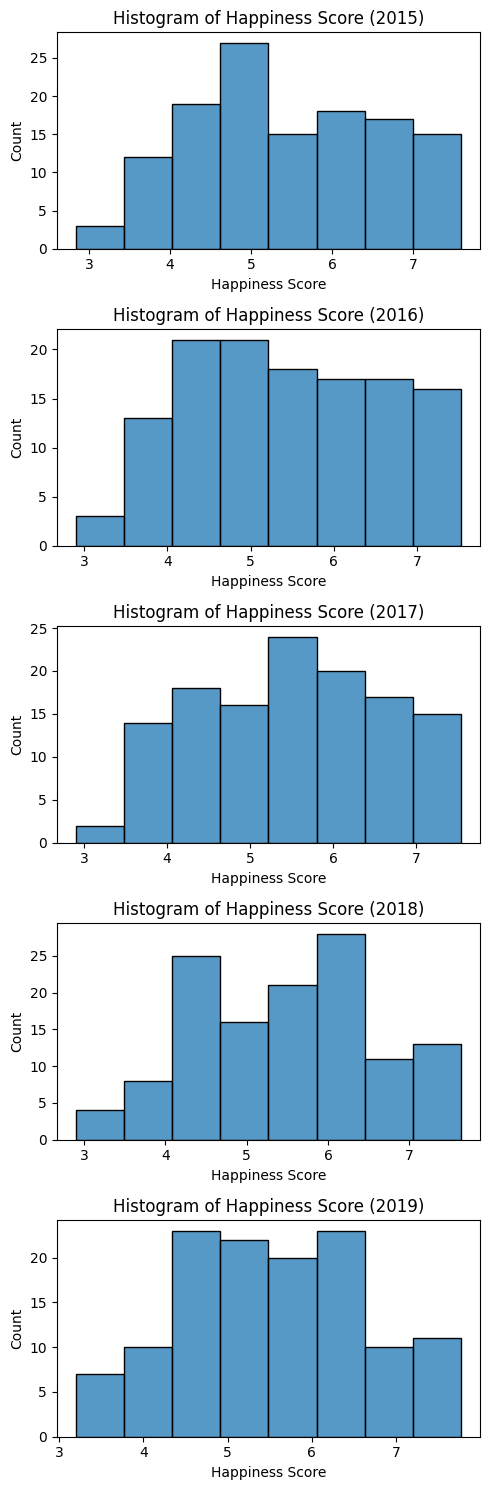

In [1506]:
# Create a list of years to loop through
years = ['2015', '2016', '2017', '2018', '2019']

# Create a figure with 5 rows and 1 column
fig, axes = plt.subplots(5, 1, figsize=(5, 15))

# Loop through each year and create a plot for each one
for i, year in enumerate(years):
    # Reference the data for the current year
    HI_year = globals()[f"HI_{year}"]
    
    # Plot the histogram
    sb.histplot(data=HI_year['Happiness Score'], ax=axes[i])

    
    # Set titles for each plot
    axes[i].set_title(f"Histogram of Happiness Score ({year})")
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
# Display the plot
plt.show()

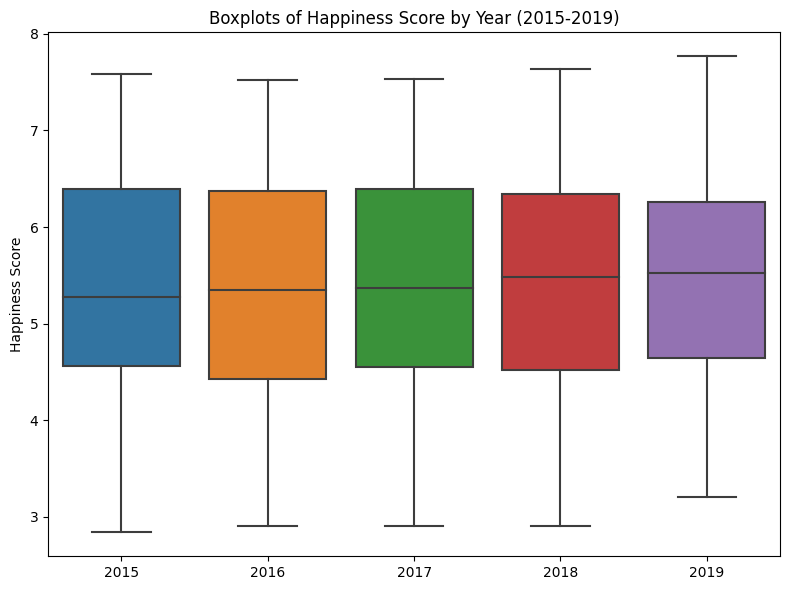

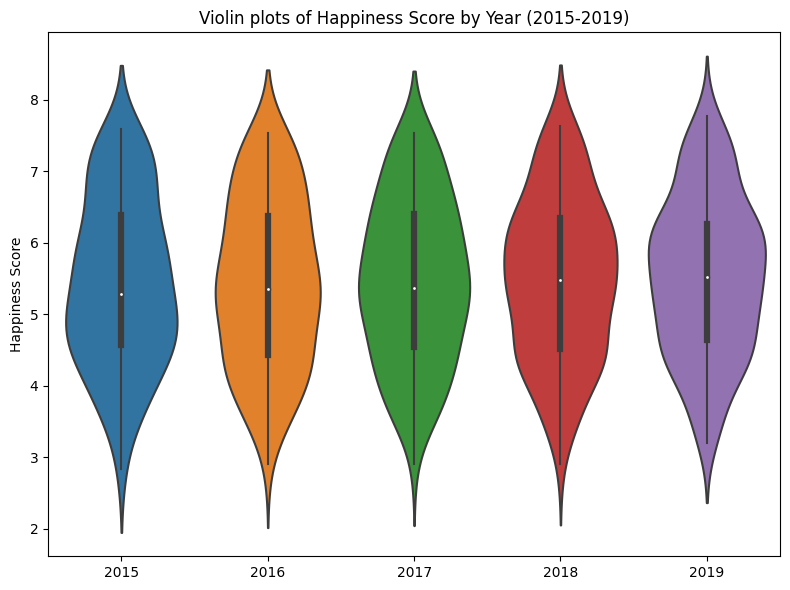

In [1507]:
# Create a list of years to loop through
years = ['2015', '2016', '2017', '2018', '2019']

# Create a figure with 1 row and 1 column for boxplots
fig_box, ax_box = plt.subplots(1, 1, figsize=(8, 6))

# Create a figure with 1 row and 1 column for violin plots
fig_violin, ax_violin = plt.subplots(1, 1, figsize=(8, 6))

# Create empty lists to store data for boxplots and violin plots
box_data = []
violin_data = []

# Loop through each year and append data to the corresponding list
for i, year in enumerate(years):
    # Reference the data for the current year
    HI_year = globals()[f"HI_{year}"]
    
    # Append the data for the current year to the corresponding list
    box_data.append(HI_year['Happiness Score'])
    violin_data.append(HI_year['Happiness Score'])
    
# Set x-tick labels to the years
ax_box.set_xticks(range(len(years)))
ax_box.set_xticklabels(years)
ax_violin.set_xticks(range(len(years)))
ax_violin.set_xticklabels(years)

# Create boxplots and violin plots from the data
sb.boxplot(data=box_data, ax=ax_box)
sb.violinplot(data=violin_data, ax=ax_violin)

# Set titles for each plot
ax_box.set_title('Boxplots of Happiness Score by Year (2015-2019)')
ax_violin.set_title('Violin plots of Happiness Score by Year (2015-2019)')

# Set y-labels for both figures
ax_box.set_ylabel('Happiness Score')
ax_violin.set_ylabel('Happiness Score')

# Adjust spacing between subplots
fig_box.tight_layout()
fig_violin.tight_layout()

# Set x-tick labels to the years
ax_box.set_xticks(range(len(years)))
ax_box.set_xticklabels(years)
ax_violin.set_xticks(range(len(years)))
ax_violin.set_xticklabels(years)

# Display the plots
plt.show()


__EDA for distribution of Human Development Index Data from 2015-2019__

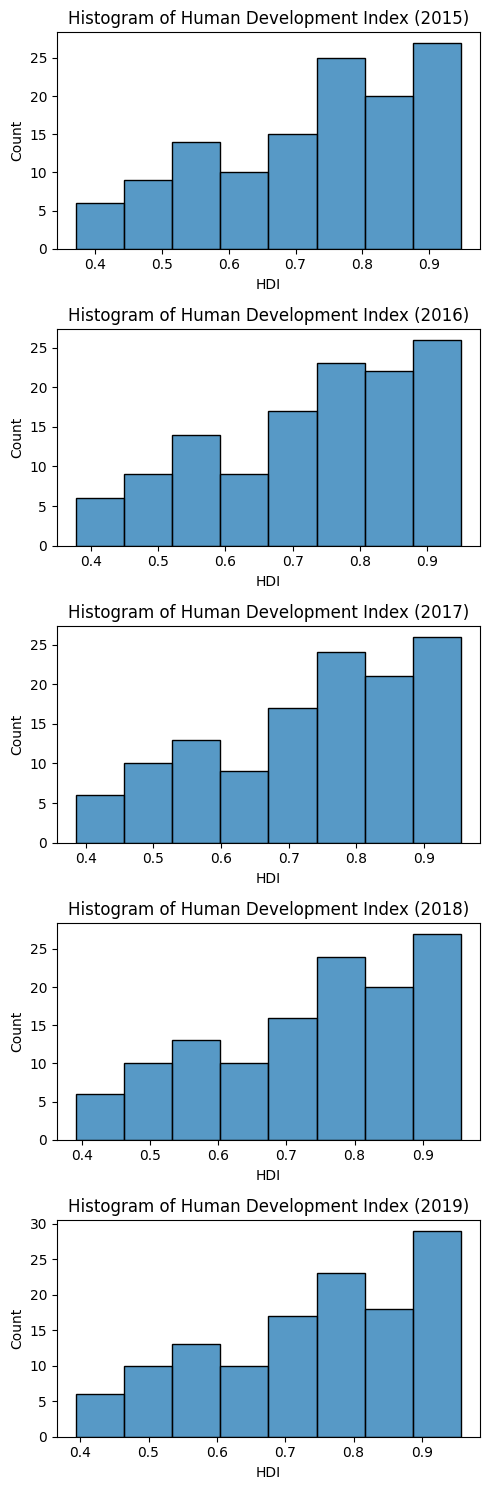

In [1508]:
# Create a list of years to loop through
years = ['2015', '2016', '2017', '2018', '2019']

# Create a figure with 5 rows and 1 column
fig, axes = plt.subplots(5, 1, figsize=(5, 15))

# Loop through each year and create a plot for each one
for i, year in enumerate(years):
    # Reference the data for the current year
    HDI_year = globals()[f"HDI_{year}"]
    
    # Plot the histogram
    sb.histplot(data=HDI_year['HDI'], ax=axes[i])

    
    # Set titles for each plot
    axes[i].set_title(f"Histogram of Human Development Index ({year})")
    
    # Adjust spacing between subplots
    plt.tight_layout()
    
# Display the plot
plt.show()

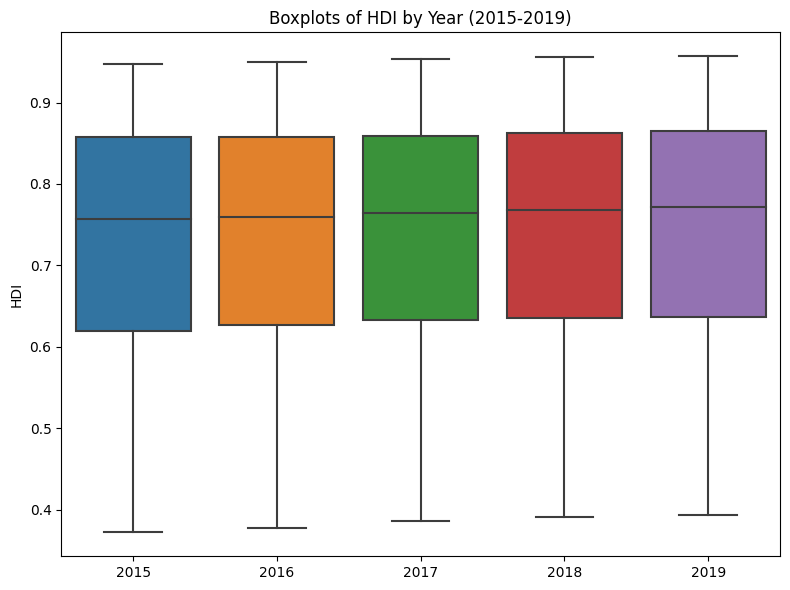

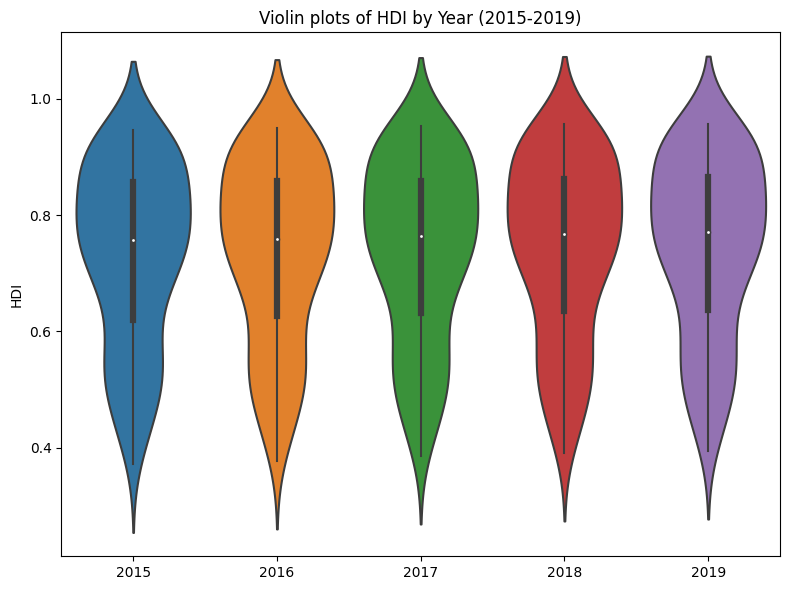

In [1509]:
# Create a list of years to loop through
years = ['2015', '2016', '2017', '2018', '2019']

# Create a figure with 1 row and 1 column for boxplots
fig_box, ax_box = plt.subplots(1, 1, figsize=(8, 6))

# Create a figure with 1 row and 1 column for violin plots
fig_violin, ax_violin = plt.subplots(1, 1, figsize=(8, 6))

# Create empty lists to store data for boxplots and violin plots
box_data = []
violin_data = []

# Loop through each year and append data to the corresponding list
for i, year in enumerate(years):
    # Reference the data for the current year
    HDI_year = globals()[f"HDI_{year}"]
    
    # Append the data for the current year to the corresponding list
    box_data.append(HDI_year['HDI'])
    violin_data.append(HDI_year['HDI'])
    
# Set x-tick labels to the years
ax_box.set_xticks(range(len(years)))
ax_box.set_xticklabels(years)
ax_violin.set_xticks(range(len(years)))
ax_violin.set_xticklabels(years)

# Create boxplots and violin plots from the data
sb.boxplot(data=box_data, ax=ax_box)
sb.violinplot(data=violin_data, ax=ax_violin)

# Set titles for each plot
ax_box.set_title('Boxplots of HDI by Year (2015-2019)')
ax_violin.set_title('Violin plots of HDI by Year (2015-2019)')

# Set y-labels for both figures
ax_box.set_ylabel('HDI')
ax_violin.set_ylabel('HDI')

# Adjust spacing between subplots
fig_box.tight_layout()
fig_violin.tight_layout()

# Set x-tick labels to the years
ax_box.set_xticks(range(len(years)))
ax_box.set_xticklabels(years)
ax_violin.set_xticks(range(len(years)))
ax_violin.set_xticklabels(years)

# Display the plots
plt.show()


__EDA of Relationships between GDP per Capita, Happiness Index and Human Development Index Data from 2015-2019__

<Axes: >

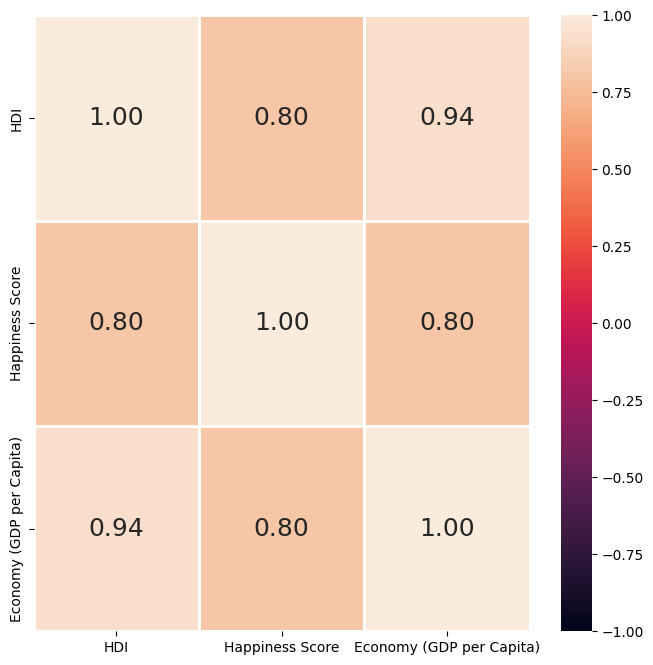

In [1580]:
# Create a correlation matrix
corr_data = pd.concat([HDI_2015['HDI'],HI_2015['Happiness Score'], HI_2015['Economy (GDP per Capita)']], axis=1).corr()

# Set the correlation of each variable with itself to 1
for col in corr_data.columns:
    corr_data.loc[col, col] = 1

# Create a heatmap of the correlation matrix
f = plt.figure(figsize=(8, 8))
sb.heatmap(corr_data, vmin=-1, vmax=1, linewidths=1,
           annot=True, fmt=".2f", annot_kws={"size": 18})

<Axes: >

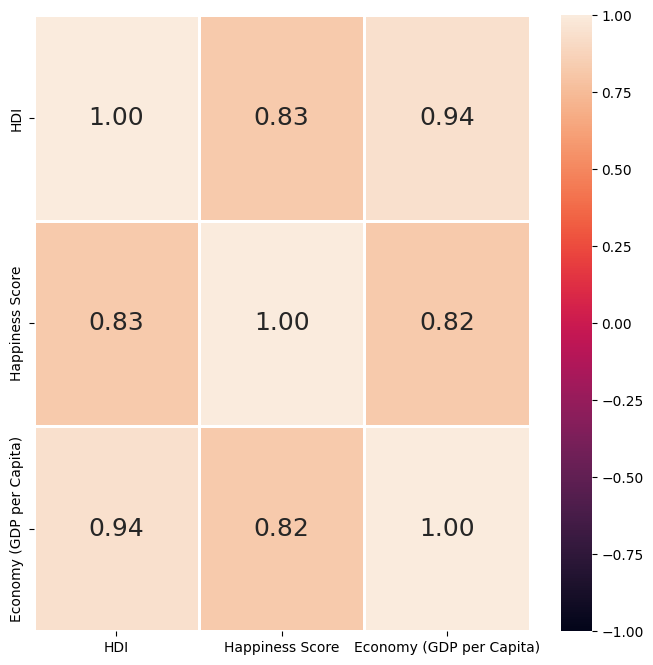

In [1511]:
# Create a correlation matrix
corr_data = pd.concat([HDI_2016['HDI'],HI_2016['Happiness Score'], HI_2016['Economy (GDP per Capita)']], axis=1).corr()

# Set the correlation of each variable with itself to 1
for col in corr_data.columns:
    corr_data.loc[col, col] = 1

# Create a heatmap of the correlation matrix
f = plt.figure(figsize=(8, 8))
sb.heatmap(corr_data, vmin=-1, vmax=1, linewidths=1,
           annot=True, fmt=".2f", annot_kws={"size": 18})

<Axes: >

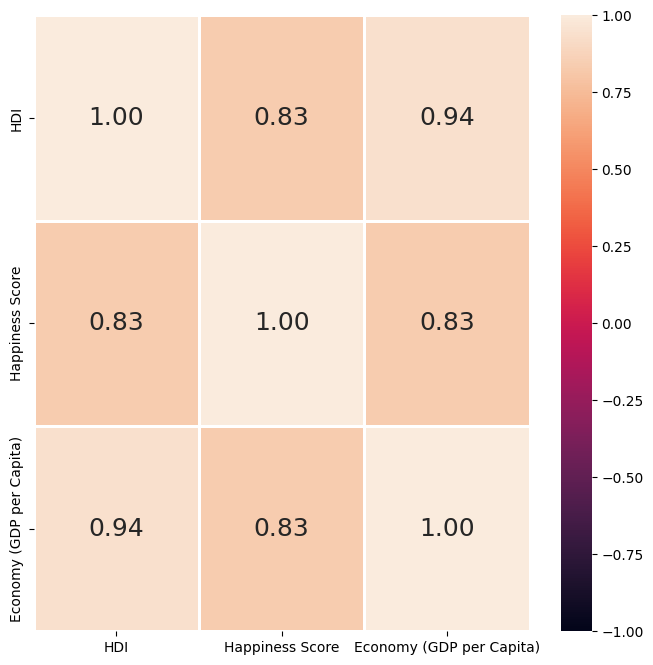

In [1512]:
# Create a correlation matrix
corr_data = pd.concat([HDI_2017['HDI'],HI_2017['Happiness Score'], HI_2017['Economy (GDP per Capita)']], axis=1).corr()

# Set the correlation of each variable with itself to 1
for col in corr_data.columns:
    corr_data.loc[col, col] = 1

# Create a heatmap of the correlation matrix
f = plt.figure(figsize=(8, 8))
sb.heatmap(corr_data, vmin=-1, vmax=1, linewidths=1,
           annot=True, fmt=".2f", annot_kws={"size": 18})

<Axes: >

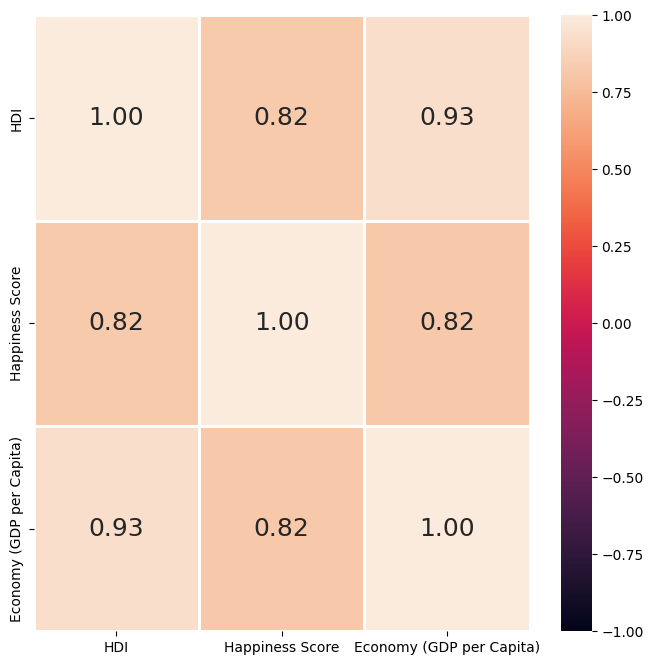

In [1513]:
# Create a correlation matrix
corr_data = pd.concat([HDI_2018['HDI'],HI_2018['Happiness Score'], HI_2018['Economy (GDP per Capita)']], axis=1).corr()

# Set the correlation of each variable with itself to 1
for col in corr_data.columns:
    corr_data.loc[col, col] = 1

# Create a heatmap of the correlation matrix
f = plt.figure(figsize=(8, 8))
sb.heatmap(corr_data, vmin=-1, vmax=1, linewidths=1,
           annot=True, fmt=".2f", annot_kws={"size": 18})

<Axes: >

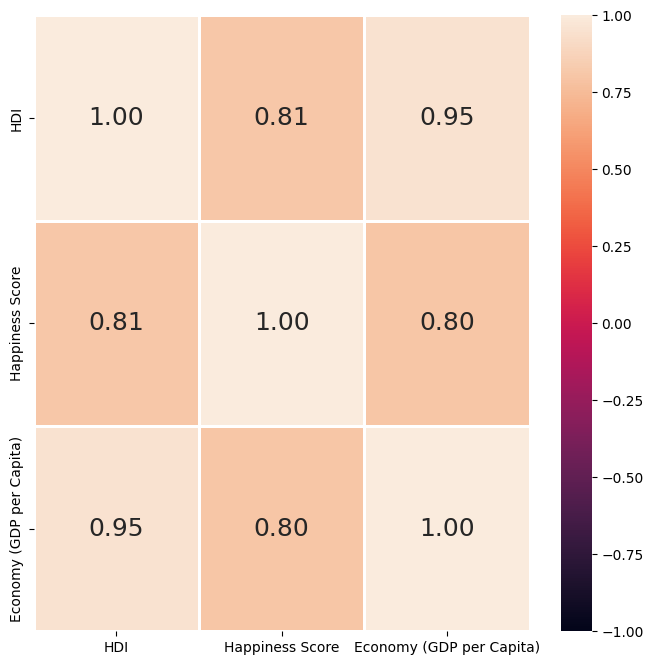

In [1514]:
# Create a correlation matrix
corr_data = pd.concat([HDI_2019['HDI'],HI_2019['Happiness Score'], HI_2019['Economy (GDP per Capita)']], axis=1).corr()

# Set the correlation of each variable with itself to 1
for col in corr_data.columns:
    corr_data.loc[col, col] = 1

# Create a heatmap of the correlation matrix
f = plt.figure(figsize=(8, 8))
sb.heatmap(corr_data, vmin=-1, vmax=1, linewidths=1,
           annot=True, fmt=".2f", annot_kws={"size": 18})

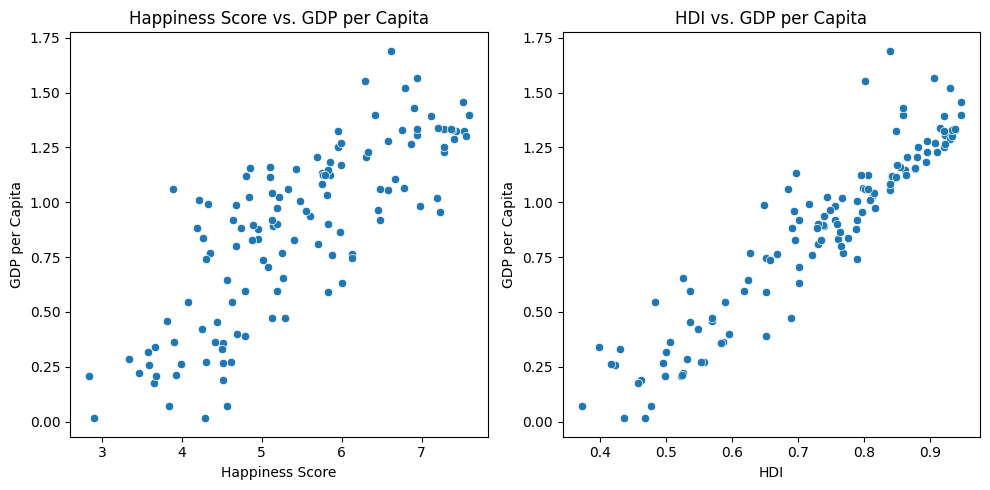

In [1515]:
# Scatter plot 1
corr_data_scatt1 = pd.concat([HI_2015['Happiness Score'], HI_2015['Economy (GDP per Capita)']], axis=1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create scatter plot 1
sb.scatterplot(data=corr_data_scatt1, x="Happiness Score", y="Economy (GDP per Capita)", ax=ax1)

# Set title and axis labels
ax1.set_title("Happiness Score vs. GDP per Capita")
ax1.set_xlabel("Happiness Score")
ax1.set_ylabel("GDP per Capita")

# Scatter plot 2
corr_data_scatt2 = pd.concat([HDI_2015['HDI'], HI_2015['Economy (GDP per Capita)']], axis=1)

# Create scatter plot 2
sb.scatterplot(data=corr_data_scatt2, x="HDI", y="Economy (GDP per Capita)", ax=ax2)

# Set title and axis labels
ax2.set_title("HDI vs. GDP per Capita")
ax2.set_xlabel("HDI")
ax2.set_ylabel("GDP per Capita")

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

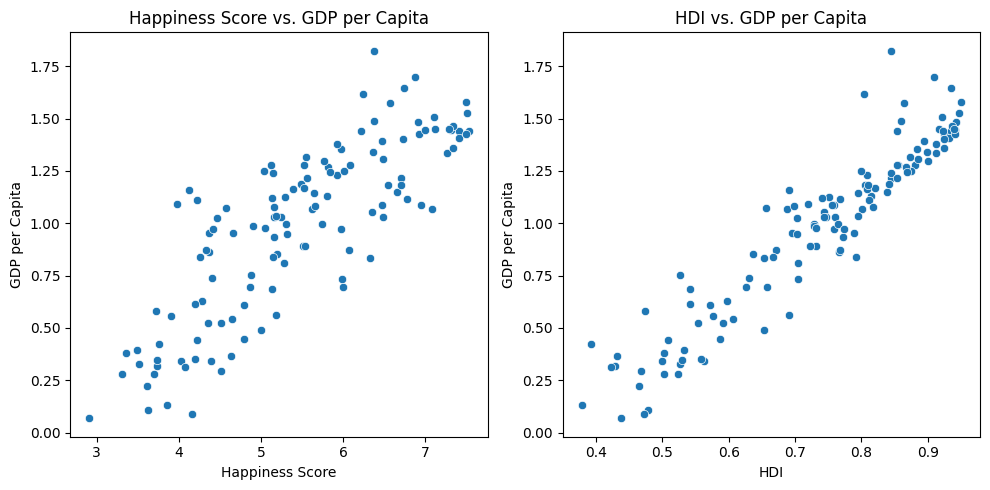

In [1581]:
# Scatter plot 1
corr_data_scatt1 = pd.concat([HI_2016['Happiness Score'], HI_2016['Economy (GDP per Capita)']], axis=1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create scatter plot 1
sb.scatterplot(data=corr_data_scatt1, x="Happiness Score", y="Economy (GDP per Capita)", ax=ax1)

# Set title and axis labels
ax1.set_title("Happiness Score vs. GDP per Capita")
ax1.set_xlabel("Happiness Score")
ax1.set_ylabel("GDP per Capita")

# Scatter plot 2
corr_data_scatt2 = pd.concat([HDI_2016['HDI'], HI_2016['Economy (GDP per Capita)']], axis=1)

# Create scatter plot 2
sb.scatterplot(data=corr_data_scatt2, x="HDI", y="Economy (GDP per Capita)", ax=ax2)

# Set title and axis labels
ax2.set_title("HDI vs. GDP per Capita")
ax2.set_xlabel("HDI")
ax2.set_ylabel("GDP per Capita")

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

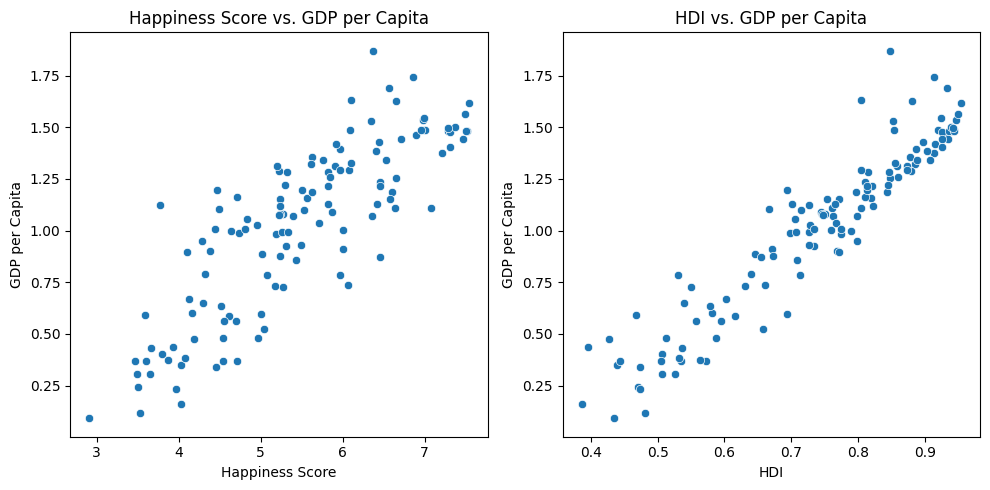

In [1582]:
# Scatter plot 1
corr_data_scatt1 = pd.concat([HI_2017['Happiness Score'], HI_2017['Economy (GDP per Capita)']], axis=1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create scatter plot 1
sb.scatterplot(data=corr_data_scatt1, x="Happiness Score", y="Economy (GDP per Capita)", ax=ax1)

# Set title and axis labels
ax1.set_title("Happiness Score vs. GDP per Capita")
ax1.set_xlabel("Happiness Score")
ax1.set_ylabel("GDP per Capita")

# Scatter plot 2
corr_data_scatt2 = pd.concat([HDI_2017['HDI'], HI_2017['Economy (GDP per Capita)']], axis=1)

# Create scatter plot 2
sb.scatterplot(data=corr_data_scatt2, x="HDI", y="Economy (GDP per Capita)", ax=ax2)

# Set title and axis labels
ax2.set_title("HDI vs. GDP per Capita")
ax2.set_xlabel("HDI")
ax2.set_ylabel("GDP per Capita")

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

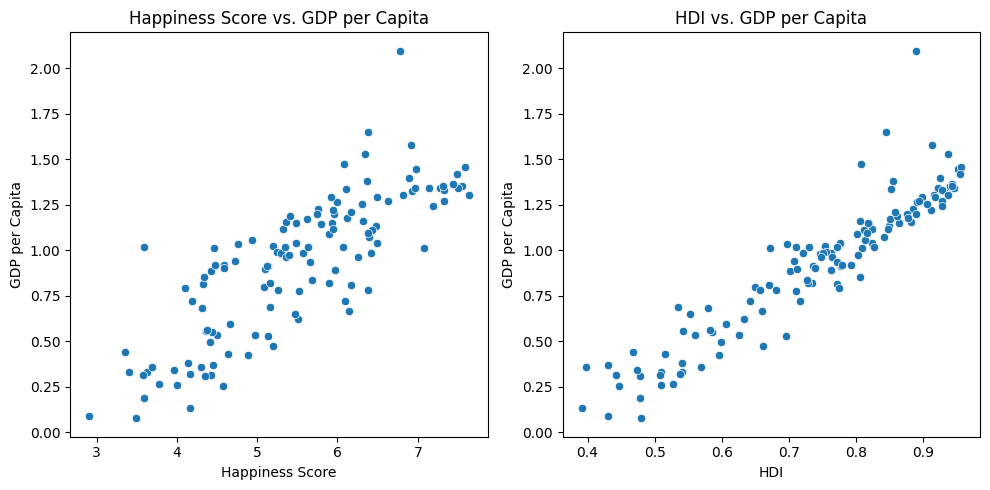

In [1583]:
# Scatter plot 1
corr_data_scatt1 = pd.concat([HI_2018['Happiness Score'], HI_2018['Economy (GDP per Capita)']], axis=1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create scatter plot 1
sb.scatterplot(data=corr_data_scatt1, x="Happiness Score", y="Economy (GDP per Capita)", ax=ax1)

# Set title and axis labels
ax1.set_title("Happiness Score vs. GDP per Capita")
ax1.set_xlabel("Happiness Score")
ax1.set_ylabel("GDP per Capita")

# Scatter plot 2
corr_data_scatt2 = pd.concat([HDI_2018['HDI'], HI_2018['Economy (GDP per Capita)']], axis=1)

# Create scatter plot 2
sb.scatterplot(data=corr_data_scatt2, x="HDI", y="Economy (GDP per Capita)", ax=ax2)

# Set title and axis labels
ax2.set_title("HDI vs. GDP per Capita")
ax2.set_xlabel("HDI")
ax2.set_ylabel("GDP per Capita")

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

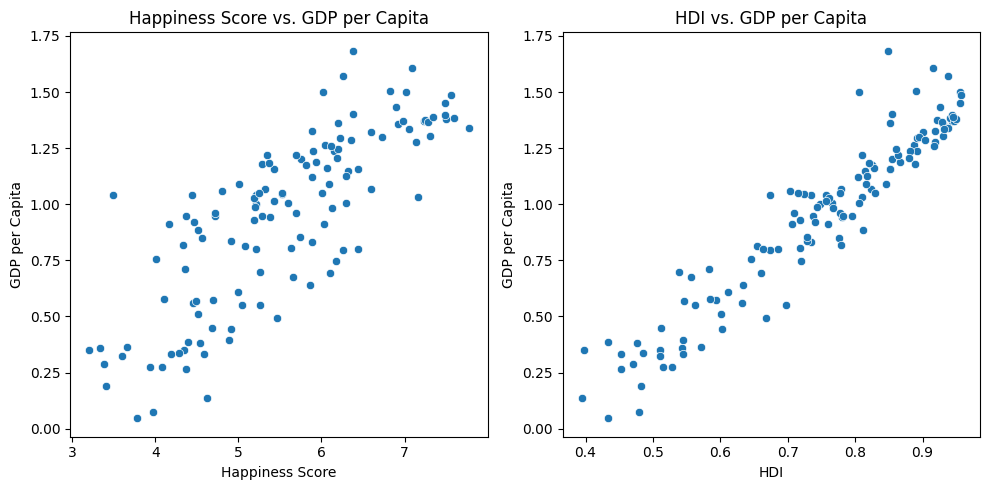

In [1584]:
# Scatter plot 1
corr_data_scatt1 = pd.concat([HI_2019['Happiness Score'], HI_2019['Economy (GDP per Capita)']], axis=1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create scatter plot 1
sb.scatterplot(data=corr_data_scatt1, x="Happiness Score", y="Economy (GDP per Capita)", ax=ax1)

# Set title and axis labels
ax1.set_title("Happiness Score vs. GDP per Capita")
ax1.set_xlabel("Happiness Score")
ax1.set_ylabel("GDP per Capita")

# Scatter plot 2
corr_data_scatt2 = pd.concat([HDI_2019['HDI'], HI_2019['Economy (GDP per Capita)']], axis=1)

# Create scatter plot 2
sb.scatterplot(data=corr_data_scatt2, x="HDI", y="Economy (GDP per Capita)", ax=ax2)

# Set title and axis labels
ax2.set_title("HDI vs. GDP per Capita")
ax2.set_xlabel("HDI")
ax2.set_ylabel("GDP per Capita")

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

# **Performing Multi-Variate Linear Regression**
We will start by setting up a Multi-Variate Linear Regression problem.

Response Variable : GDP per capita 

Predictor Feature : Human Development Index and Happiness Index
> GDP per capita = β0 + β1 * HDI + β2 * Happiness Index + ε

The reasoning behind this was:
Changes in HDI and happiness index are associated with changes in GDP per capita. The resulting model will have an equation in the form above.


Before we get into the Multivariate Linear Regression modelling, we first try to find out the linear relationship between the variables we plan to use. Remember that in the end we will make 5 models. So let us check the linear relationship of all of them. (idk if we need to do this, but its best to do, but then again we have to do so much...)

# **Multi-Variate Linear Regression on the 2015 data**

Extract the variables and the associated data as a Pandas DataFrame. But first, let us merge it into one dataframe to make it easier. We will repeat this for all years as well.

In [1516]:
#Merging all dataframes
MERGED2015 = GDP_2015.merge(HI_2015, on='Country').merge(HDI_2015, on='Country')
MERGED2015.head()

,Economy (GDP per Capita)_x,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita)_y,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HDI
Country,,,,,,,,,,,,,
Afghanistan,0.31982,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,0.500
Albania,0.87867,Central and Eastern Europe,95,4.959,0.05013,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,0.788
Algeria,0.93929,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,0.740
Argentina,1.05351,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,0.840
Armenia,0.76821,Central and Eastern Europe,127,4.350,0.04763,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873,0.768


In [1517]:
#Extracting the Response and Predictors
y = pd.DataFrame(MERGED2015["Economy (GDP per Capita)_x"])
X = pd.DataFrame(MERGED2015[["Happiness Score", "HDI"]])

Split the dataset in Train and Test sets, uniformly at random.
Train Set with 80% of data and Test Set with 20% of data.

In [1518]:
# Split the Dataset into Train and Test
X_train2015, X_test2015, y_train2015, y_test2015 = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set for 2015:", y_train2015.shape, X_train2015.shape)
print("Test Set for 2015:", y_test2015.shape, X_test2015.shape)

Train Set for 2015: (94, 1) (94, 2)
Test Set for 2015: (32, 1) (32, 2)


### **Basic Exploration (2015 data)**


Perform basic statistical exploration and visualization on the Train Set.

In [1519]:
# Summary Statistics for Response
y_train2015.describe()

,Economy (GDP per Capita)_x
count,94.000000
mean,0.851229
std,0.409286
min,0.015300
25%,0.492105
50%,0.897780
75%,1.158448
max,1.690420


In [1520]:
# Summary Statistics for Predictors
X_train2015.describe()

,Happiness Score,HDI
count,94.000000,94.000000
mean,5.377351,0.721585
std,1.160105,0.156948
min,2.839000,0.372000
25%,4.515000,0.587750
50%,5.232500,0.752500
75%,6.253750,0.849500
max,7.587000,0.947000


<Axes: >

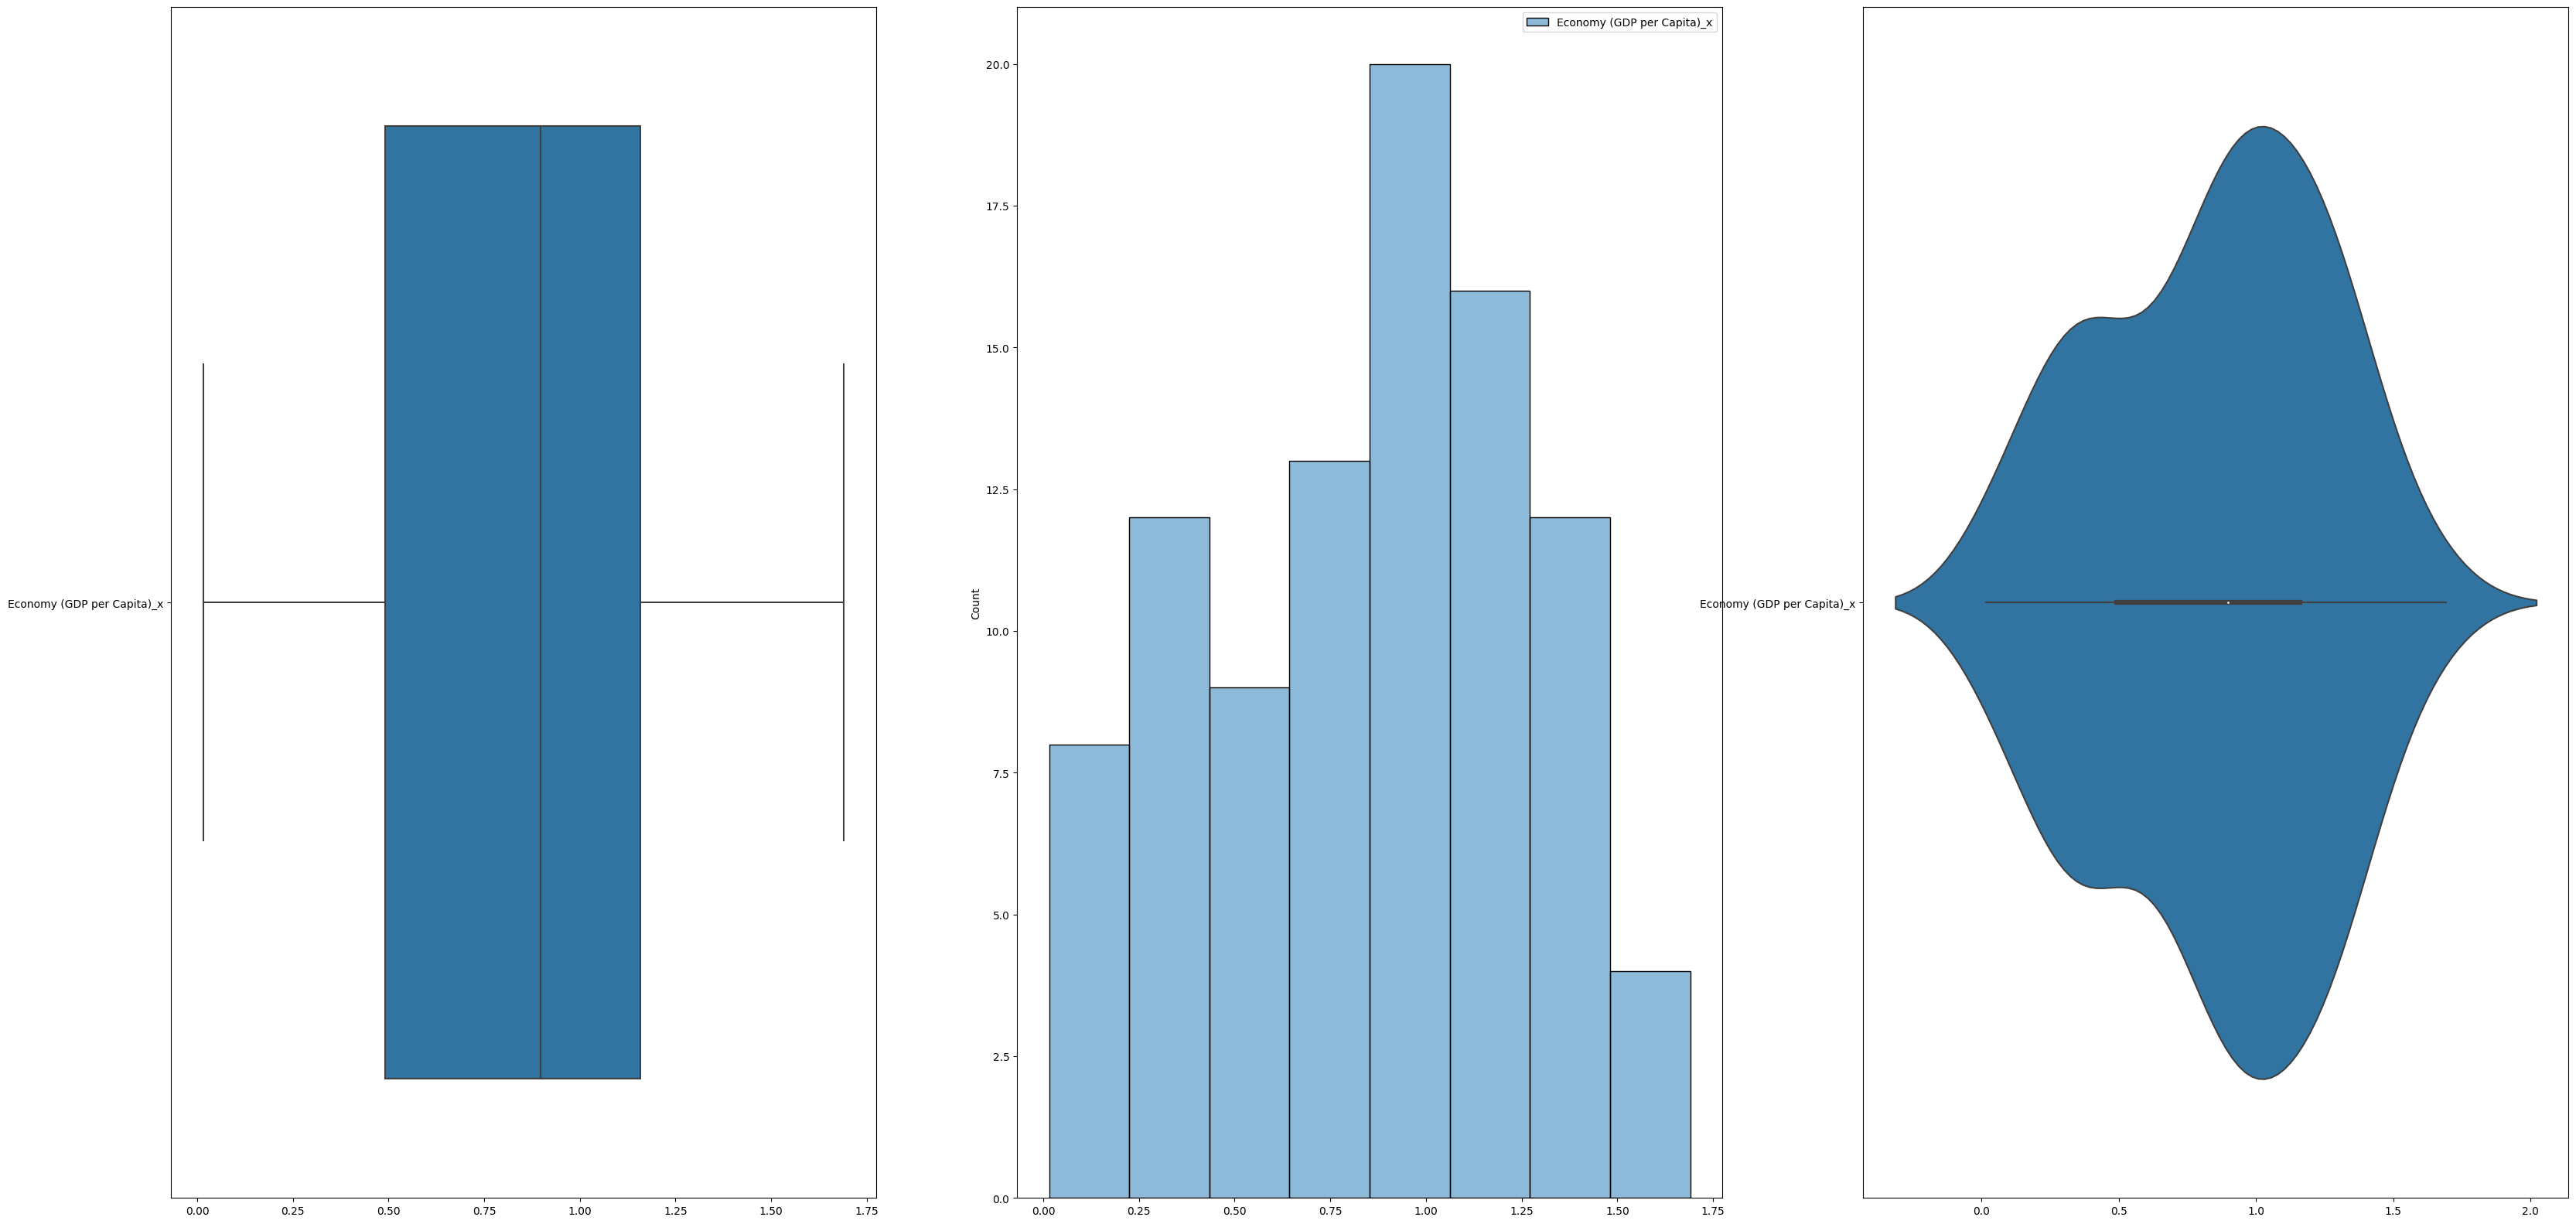

In [1521]:
# We then draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(40, 20))
sb.boxplot(data = y_train2015, orient = "h", ax = axes[0])
sb.histplot(data = y_train2015, ax = axes[1])
sb.violinplot(data = y_train2015, orient = "h", ax = axes[2])

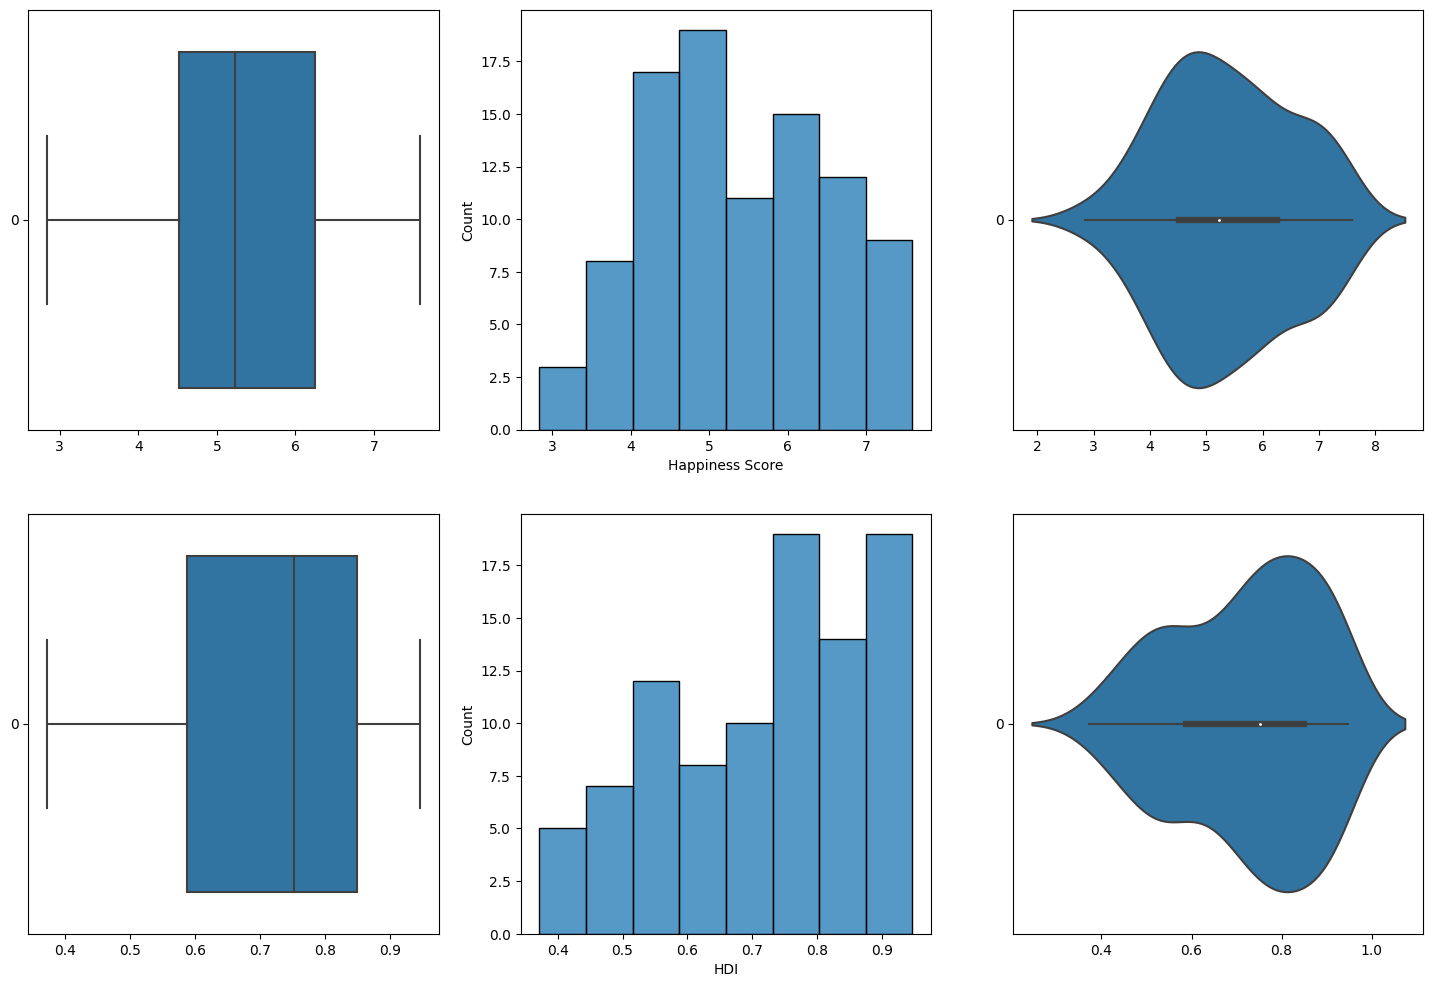

In [1522]:
# After that we draw the distributions of all Predictors
f, axes = plt.subplots(2, 3, figsize=(18, 12))

count = 0
for var in X_train2015:
    sb.boxplot(data = X_train2015[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = X_train2015[var], ax = axes[count,1])
    sb.violinplot(data = X_train2015[var], orient = "h", ax = axes[count,2])
    count += 1

<Axes: >

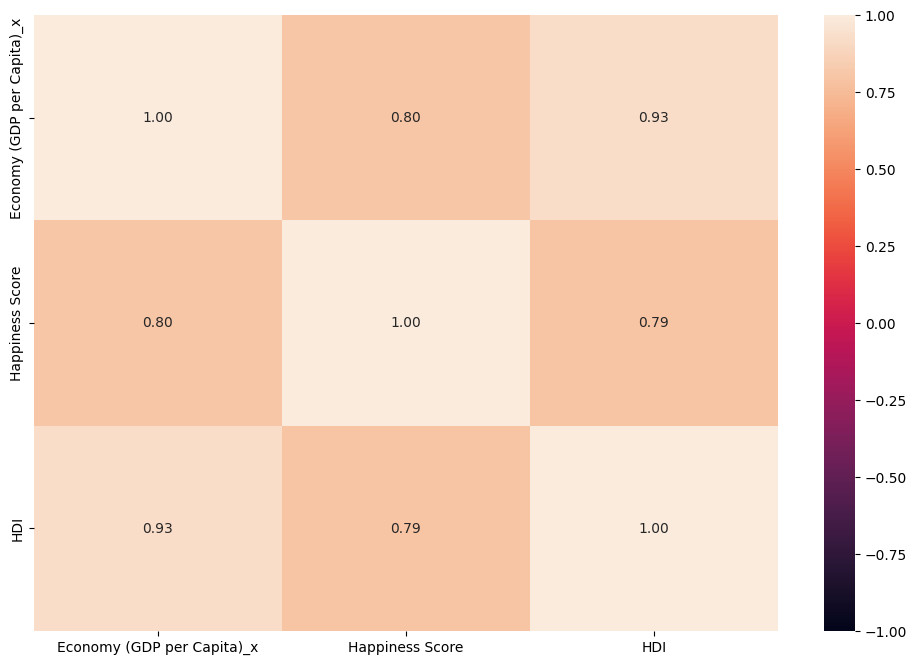

In [1523]:
# Now we make a heatmap to find the correlation between Response and the Predictors
trainDF2015 = pd.concat([y_train2015, X_train2015], axis = 1).reindex(y_train2015.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF2015.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

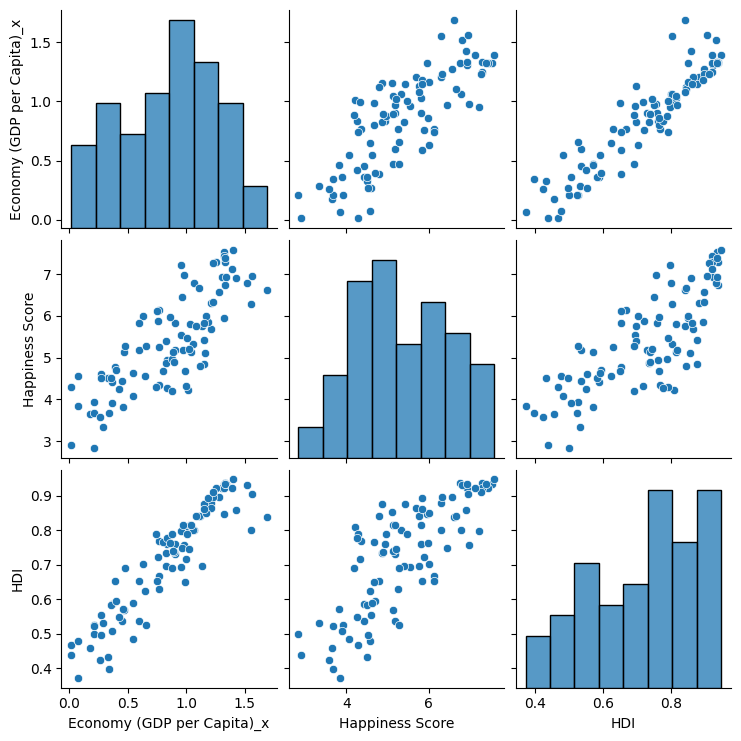

In [1524]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF2015)

## **Linear Regression using Scikit-Learn (2015 data)**

In [1525]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train2015, y_train2015)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train2015.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-0.96971814]
Coefficients of Regression 	: a =  [[0.06537029 2.03638887]]



,Predictors,Coefficients
0,Happiness Score,0.065370
1,HDI,2.036389


Remember the following:

Response Variable : **GDP per capita **

Predictor Feature : **Human Development Index** and **Happiness Index**

> Regression Model : GDP per capita = β0 + β1 * HDI + β2 * Happiness Index + ε



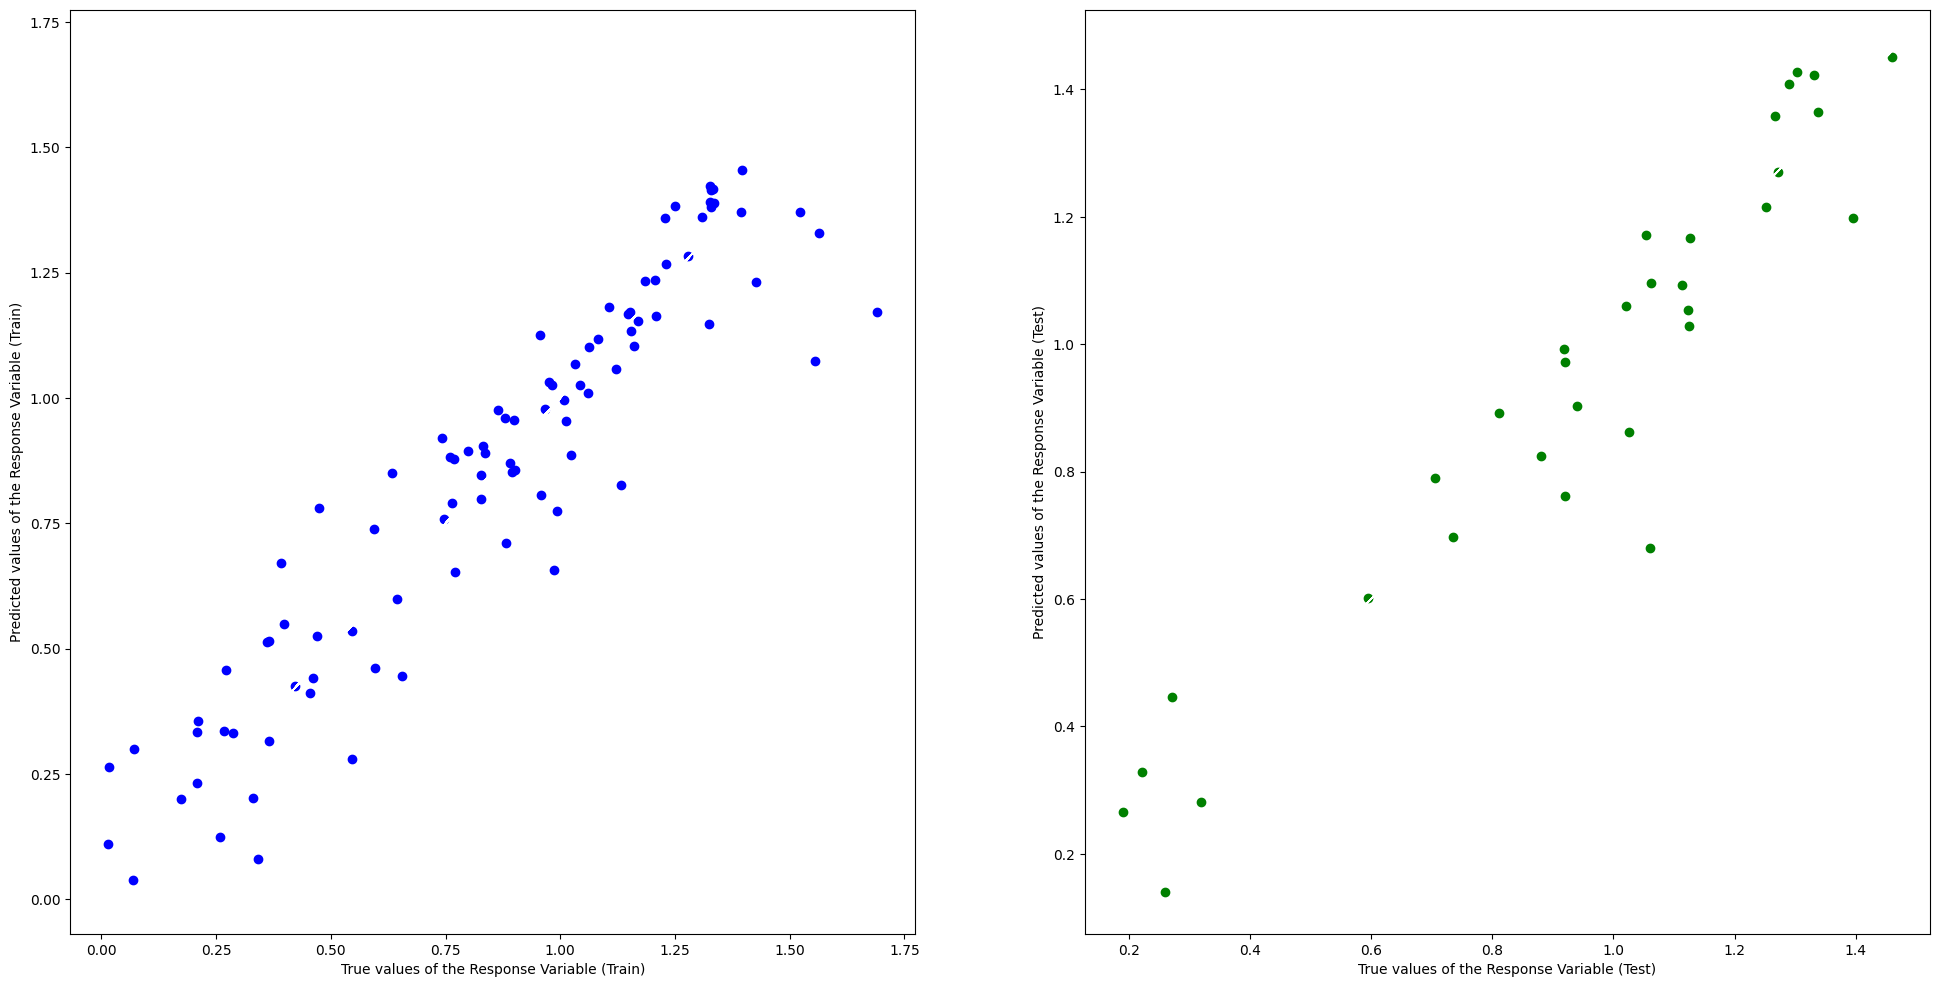

In [1526]:
# Predict the Total values from Predictors
y_train_pred2015 = linreg.predict(X_train2015)
y_test_pred2015 = linreg.predict(X_test2015)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train2015, y_train_pred2015, color = "blue")
axes[0].plot(y_train2015, y_train2015, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test2015, y_test_pred2015, color = "green")
axes[1].plot(y_test2015, y_test2015, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## **Goodness of Fit (2015 data)**

In [1527]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train2015, y_train2015))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train2015, y_train_pred2015))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test2015, y_test2015))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test2015, y_test_pred2015))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8724952553155294
Mean Squared Error (MSE) 	: 0.021131762080777897

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9018134992051904
Mean Squared Error (MSE) 	: 0.012729663331990616



# **Multi-Variate Linear Regression on the 2016 data**

In [1528]:
#Merging all dataframes
MERGED2016 = GDP_2016.merge(HI_2016, on='Country').merge(HDI_2016, on='Country')
MERGED2016.head()

,Economy (GDP per Capita)_x,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita)_y,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HDI
Country,,,,,,,,,,,,,,
Afghanistan,0.38227,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,0.502
Albania,0.95530,Central and Eastern Europe,109,4.655,4.546,4.764,0.95530,0.50163,0.73007,0.31866,0.05301,0.16840,1.92816,0.788
Algeria,1.05266,Middle East and Northern Africa,38,6.355,6.227,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,0.743
Argentina,1.15137,Latin America and Caribbean,26,6.650,6.560,6.740,1.15137,1.06612,0.69711,0.42284,0.07296,0.10989,3.12985,0.839
Armenia,0.86086,Central and Eastern Europe,121,4.360,4.266,4.454,0.86086,0.62477,0.64083,0.14037,0.03616,0.07793,1.97864,0.766


In [1529]:
#Extracting the Response and Predictors
y = pd.DataFrame(MERGED2016["Economy (GDP per Capita)_x"])
X = pd.DataFrame(MERGED2016[["Happiness Score", "HDI"]])

Split the dataset in Train and Test sets, uniformly at random. Train Set with 80% of data and Test Set with 20% of data.

In [1530]:
# Split the Dataset into Train and Test
X_train2016, X_test2016, y_train2016, y_test2016 = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set for 2016:", y_train2016.shape, X_train2016.shape)
print("Test Set for 2016:", y_test2016.shape, X_test2016.shape)

Train Set for 2016: (94, 1) (94, 2)
Test Set for 2016: (32, 1) (32, 2)


### **Basic Exploration (2016 data)**

Perform basic statistical exploration and visualization on the Train Set.

In [1531]:
# Summary Statistics for Response
y_train2016.describe()

,Economy (GDP per Capita)_x
count,94.000000
mean,0.964295
std,0.440230
min,0.068310
25%,0.573335
50%,1.059770
75%,1.330200
max,1.824270


In [1532]:
# Summary Statistics for Predictors
X_train2016.describe()

,Happiness Score,HDI
count,94.000000,94.000000
mean,5.455798,0.728723
std,1.237076,0.161675
min,2.905000,0.378000
25%,4.372500,0.591000
50%,5.401000,0.753500
75%,6.477000,0.862750
max,7.526000,0.947000


<Axes: >

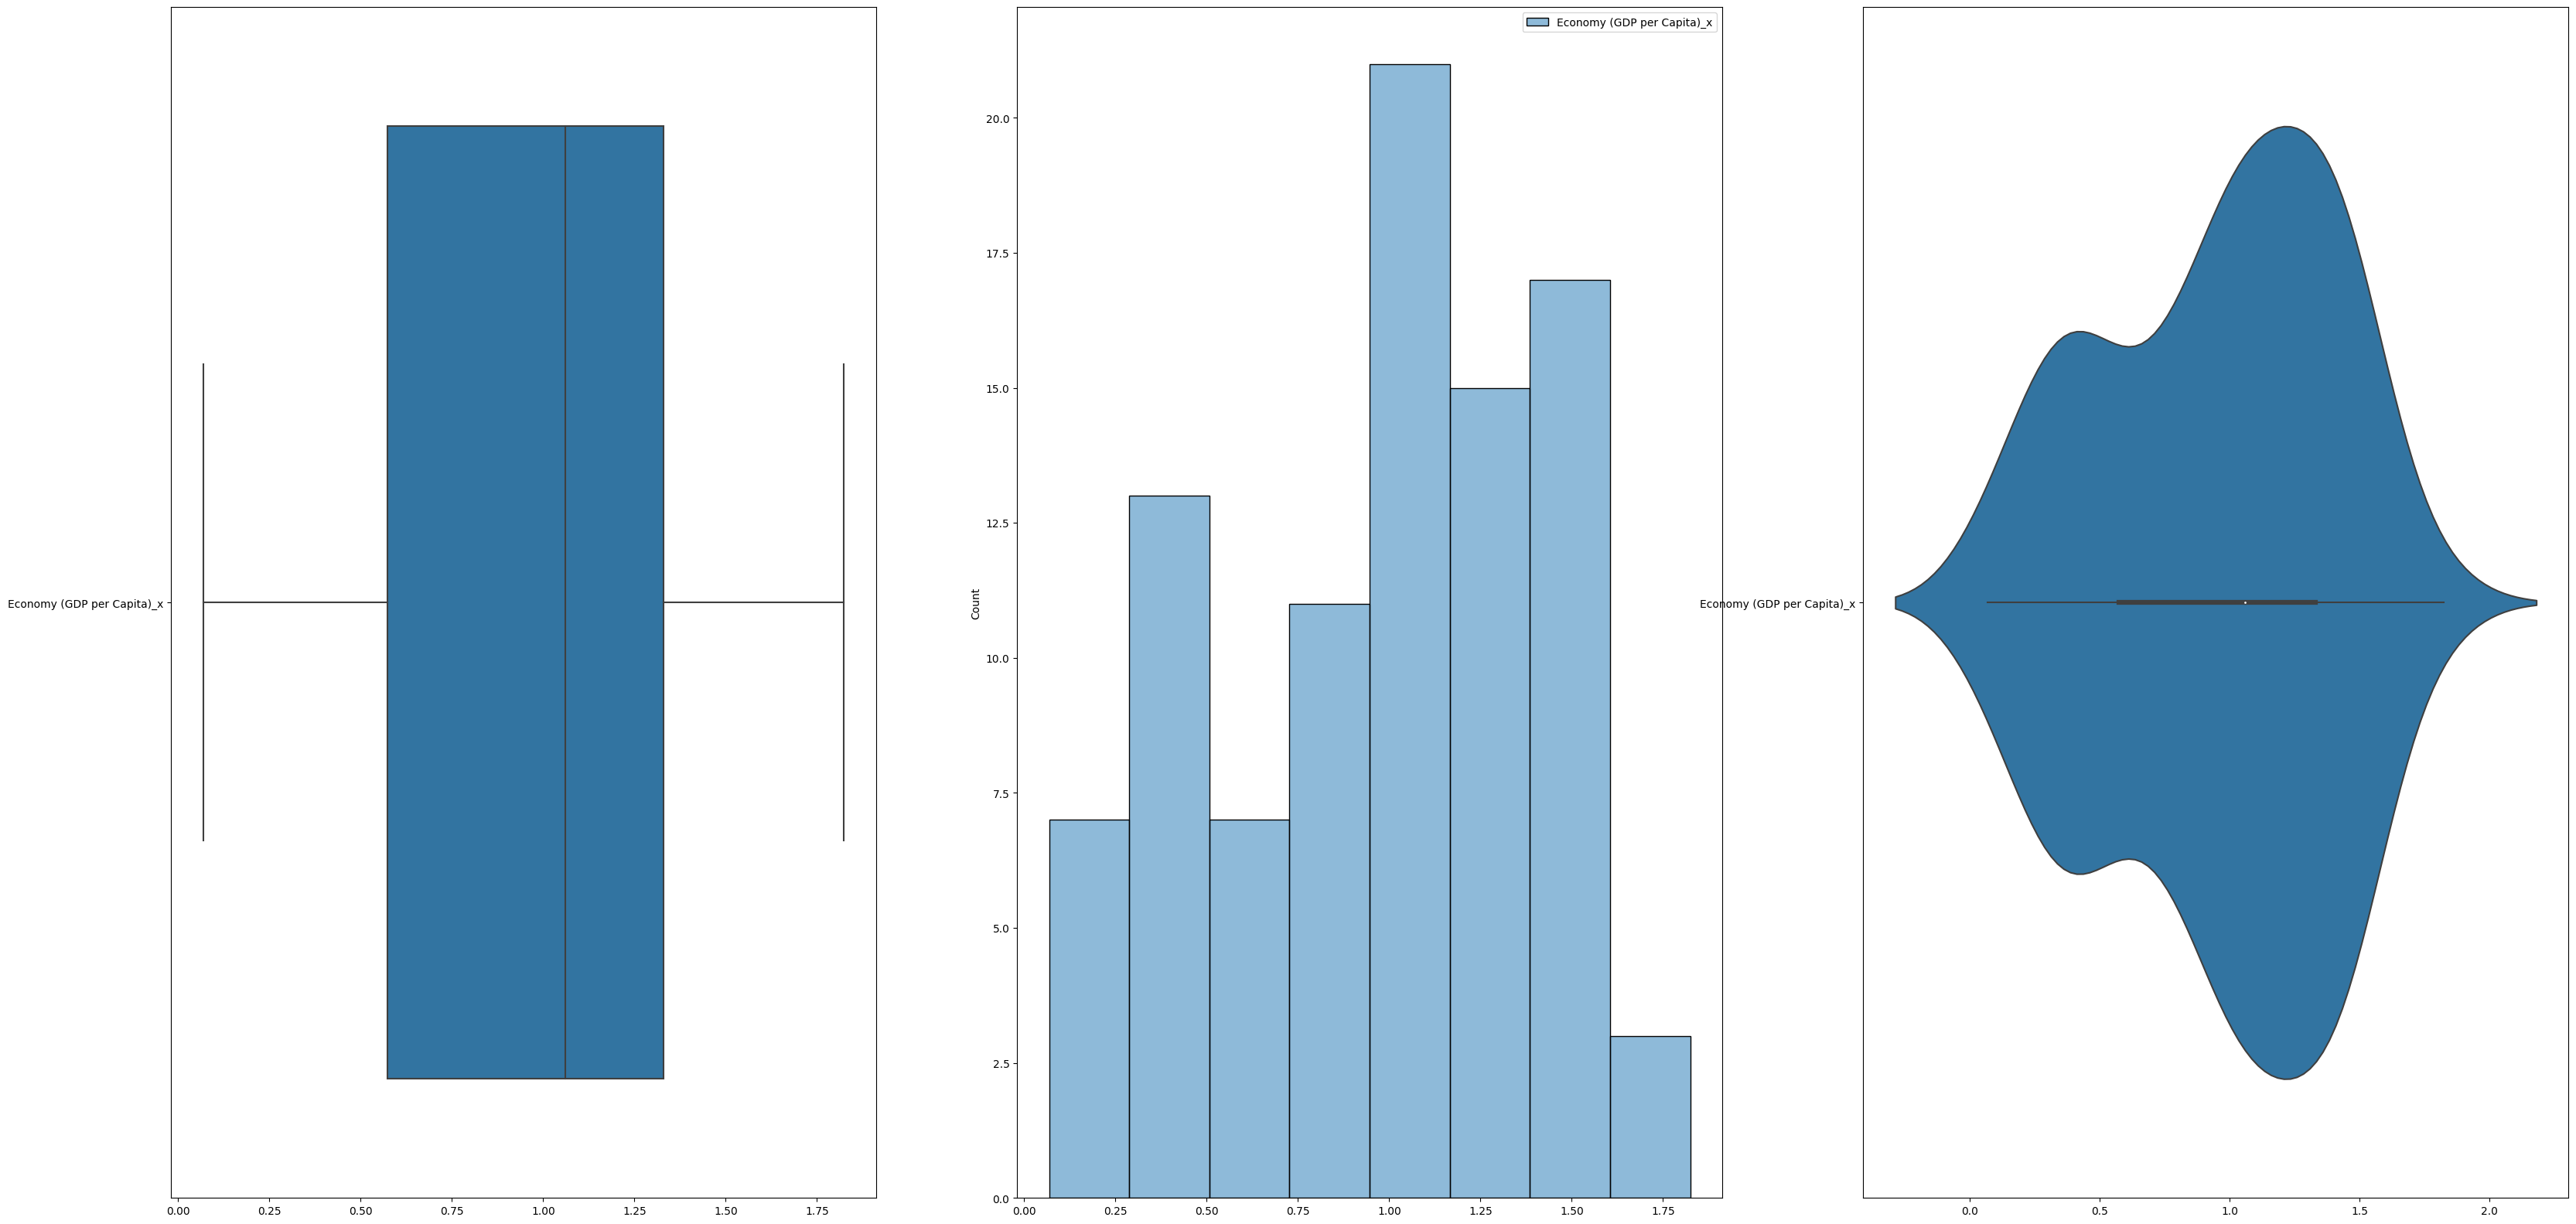

In [1533]:
# We then draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(40, 20))
sb.boxplot(data = y_train2016, orient = "h", ax = axes[0])
sb.histplot(data = y_train2016, ax = axes[1])
sb.violinplot(data = y_train2016, orient = "h", ax = axes[2])

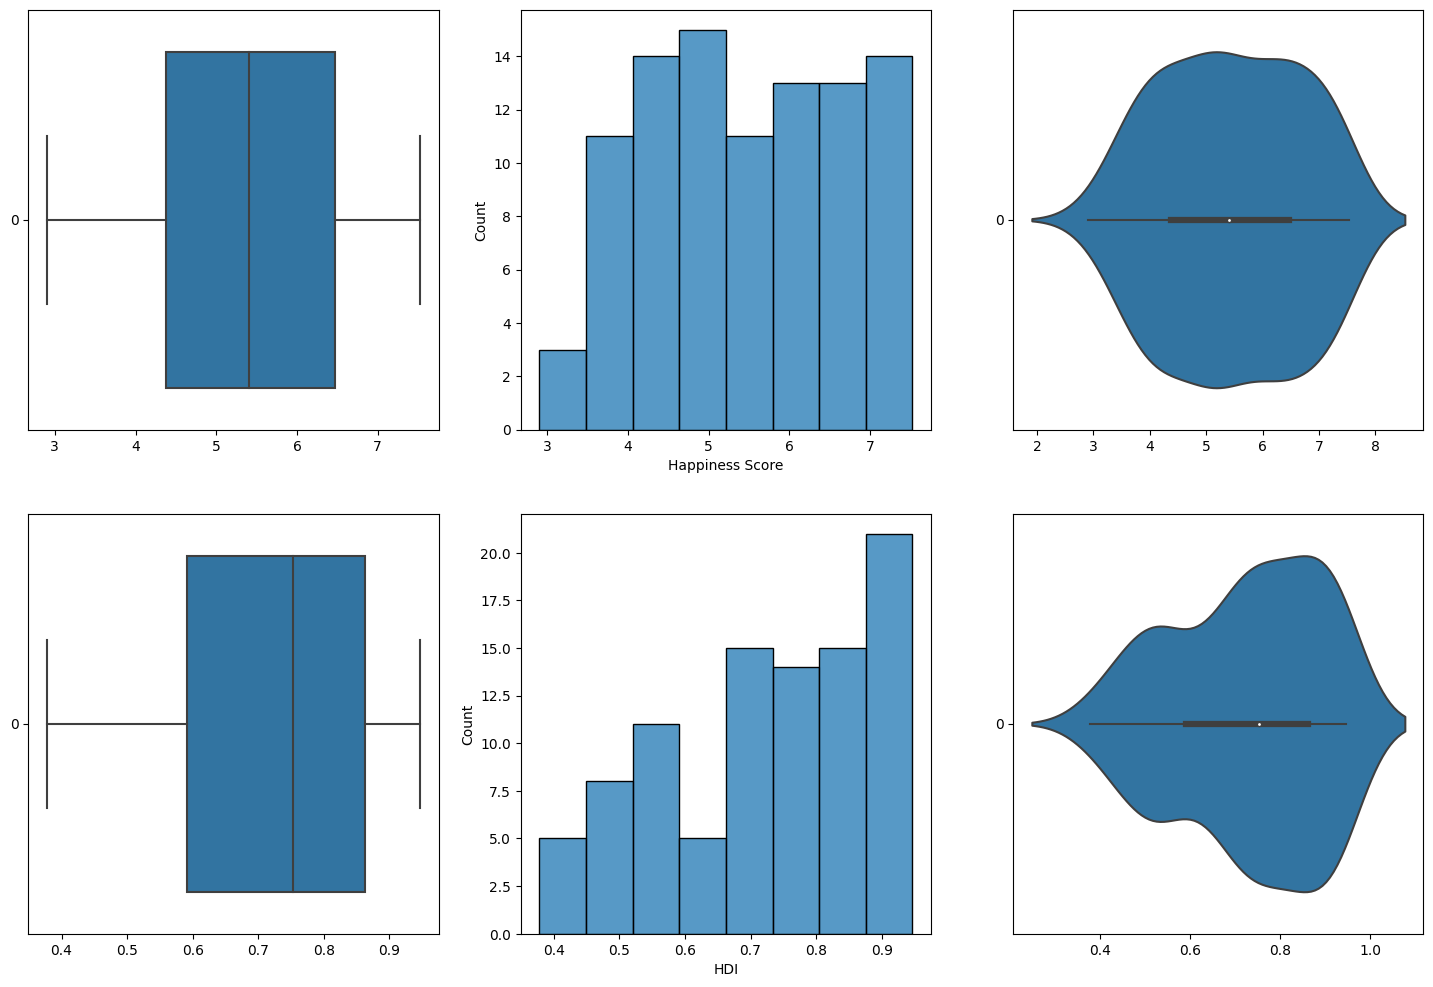

In [1534]:
# After that we draw the distributions of all Predictors
f, axes = plt.subplots(2, 3, figsize=(18, 12))

count = 0
for var in X_train2016:
    sb.boxplot(data = X_train2016[var], orient = "h", ax = axes[count, 0])
    sb.histplot(data = X_train2016[var], ax = axes[count, 1])
    sb.violinplot(data = X_train2016[var], orient = "h", ax = axes[count, 2])
    count += 1

<Axes: >

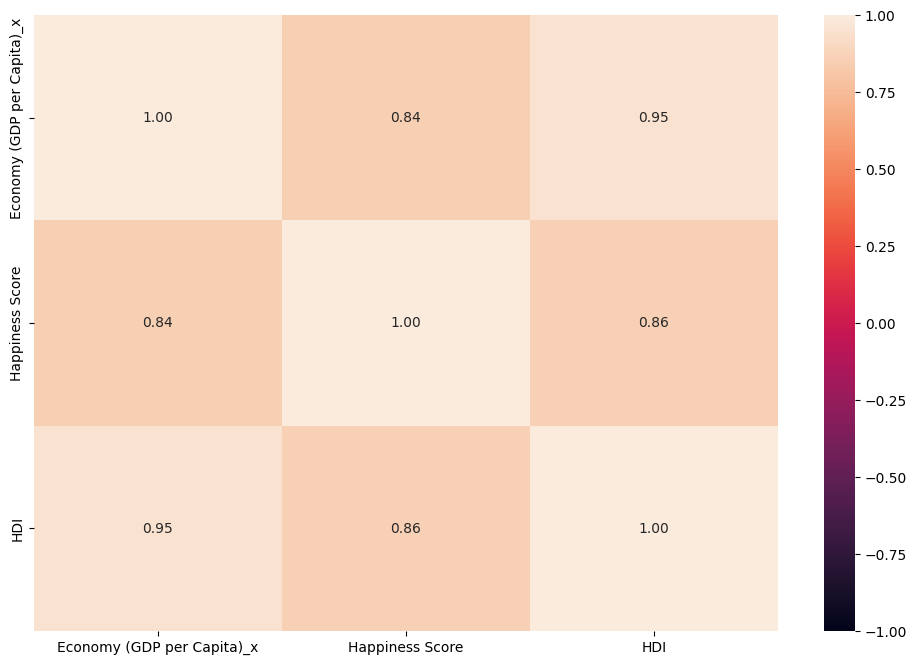

In [1535]:
# Now we make a heatmap to find the correlation between Response and the Predictors
trainDF2016 = pd.concat([y_train2016, X_train2016], axis = 1).reindex(y_train2016.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF2016.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")


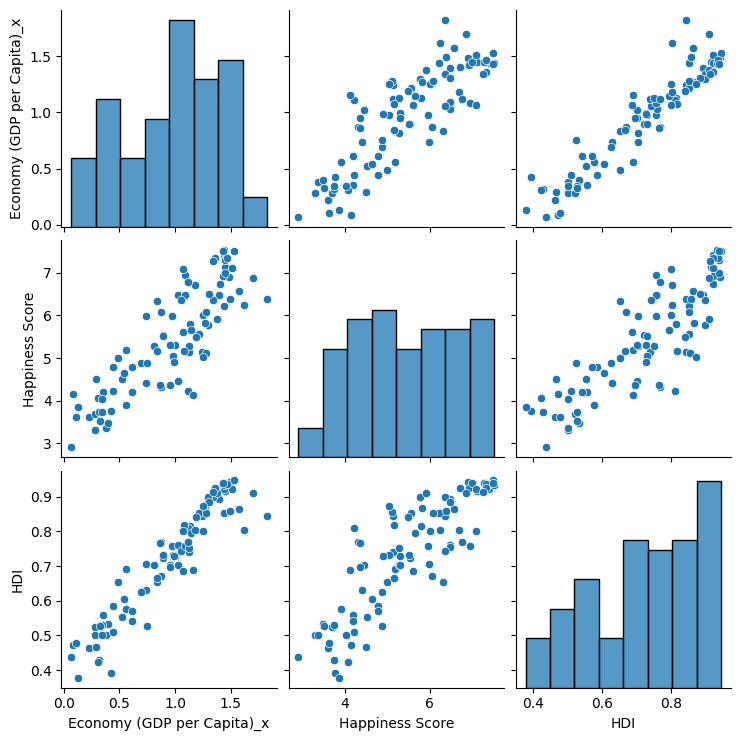

In [1536]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF2016)

## Linear Regression using Scikit-Learn (2016 data)

In [1537]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train2016, y_train2016)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train2016.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])


Intercept of Regression 	: b =  [-0.94607741]
Coefficients of Regression 	: a =  [[0.04636044 2.27444181]]



,Predictors,Coefficients
0,Happiness Score,0.046360
1,HDI,2.274442


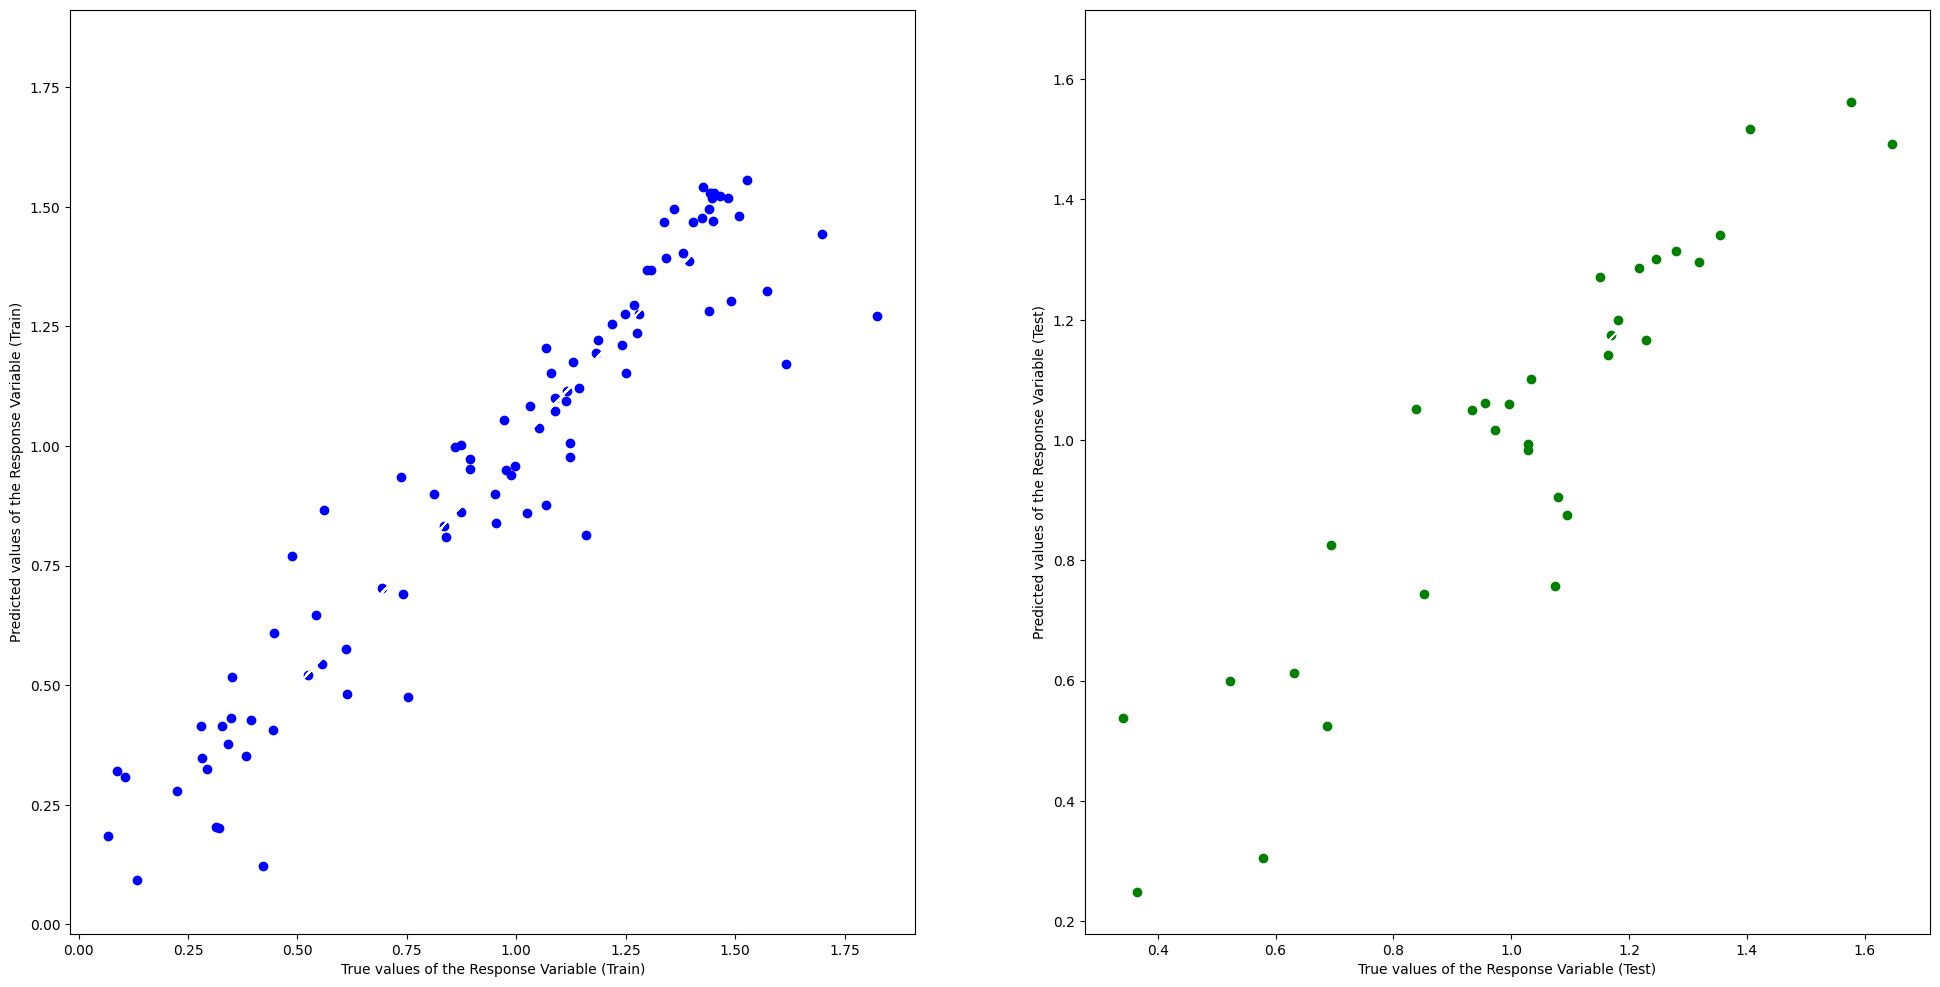

In [1538]:
# Predict the Total values from Predictors
y_train_pred2016 = linreg.predict(X_train2016)
y_test_pred2016 = linreg.predict(X_test2016)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train2016, y_train_pred2016, color = "blue")
axes[0].plot(y_train2016,y_train2016, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test2016, y_test_pred2016, color = "green")
axes[1].plot(y_test2016, y_test2016, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


## Goodness of Fit (2016 data)

In [1539]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train2016, y_train2016))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train2016, y_train_pred2016))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test2016, y_test2016))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test2016, y_test_pred2016))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9008922957373657
Mean Squared Error (MSE) 	: 0.01900295966648649

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8344463497761998
Mean Squared Error (MSE) 	: 0.016179933504187102



# **Multi-Variate Linear Regression on the 2017 data**

In [1540]:
#Merging all dataframes
MERGED2017 = GDP_2017.merge(HI_2017, on='Country').merge(HDI_2017, on='Country')
MERGED2017.head()

,Economy (GDP per Capita)_x,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita)_y,Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,HDI
Country,,,,,,,,,,,,,
Afghanistan,0.401477,141,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,0.506
Albania,0.996193,109,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442,0.790
Algeria,1.091864,53,5.872,5.978286,5.765714,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,2.567604,0.745
Argentina,1.185295,24,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005,0.843
Armenia,0.900597,121,4.376,4.466735,4.285265,0.900597,1.007484,0.637524,0.198303,0.083488,0.026674,1.521499,0.769


In [1541]:
#Extracting the Response and Predictors
y = pd.DataFrame(MERGED2017["Economy (GDP per Capita)_x"])
X = pd.DataFrame(MERGED2017[["Happiness Score", "HDI"]])

Split the dataset in Train and Test sets, uniformly at random. Train Set with 80% of data and Test Set with 20% of data.

In [1542]:
# Split the Dataset into Train and Test
X_train2017, X_test2017, y_train2017, y_test2017 = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set for 2017:", y_train2017.shape, X_train2017.shape)
print("Test Set for 2017:", y_test2017.shape, X_test2017.shape)

Train Set for 2017: (94, 1) (94, 2)
Test Set for 2017: (32, 1) (32, 2)


## **Basic Exploration**

Perform basic statistical exploration and visualization on the Train Set.

In [1543]:
# Summary Statistics for Response
y_train2017.describe()

,Economy (GDP per Capita)_x
count,94.000000
mean,0.975509
std,0.417914
min,0.091623
25%,0.606267
50%,1.080270
75%,1.288619
max,1.870766


In [1544]:
# Summary Statistics for Predictors
X_train2017.describe()

,Happiness Score,HDI
count,94.000000,94.000000
mean,5.332947,0.724404
std,1.118368,0.155773
min,2.905000,0.386000
25%,4.461250,0.596750
50%,5.283000,0.757000
75%,6.095250,0.847500
max,7.522000,0.943000


<Axes: >

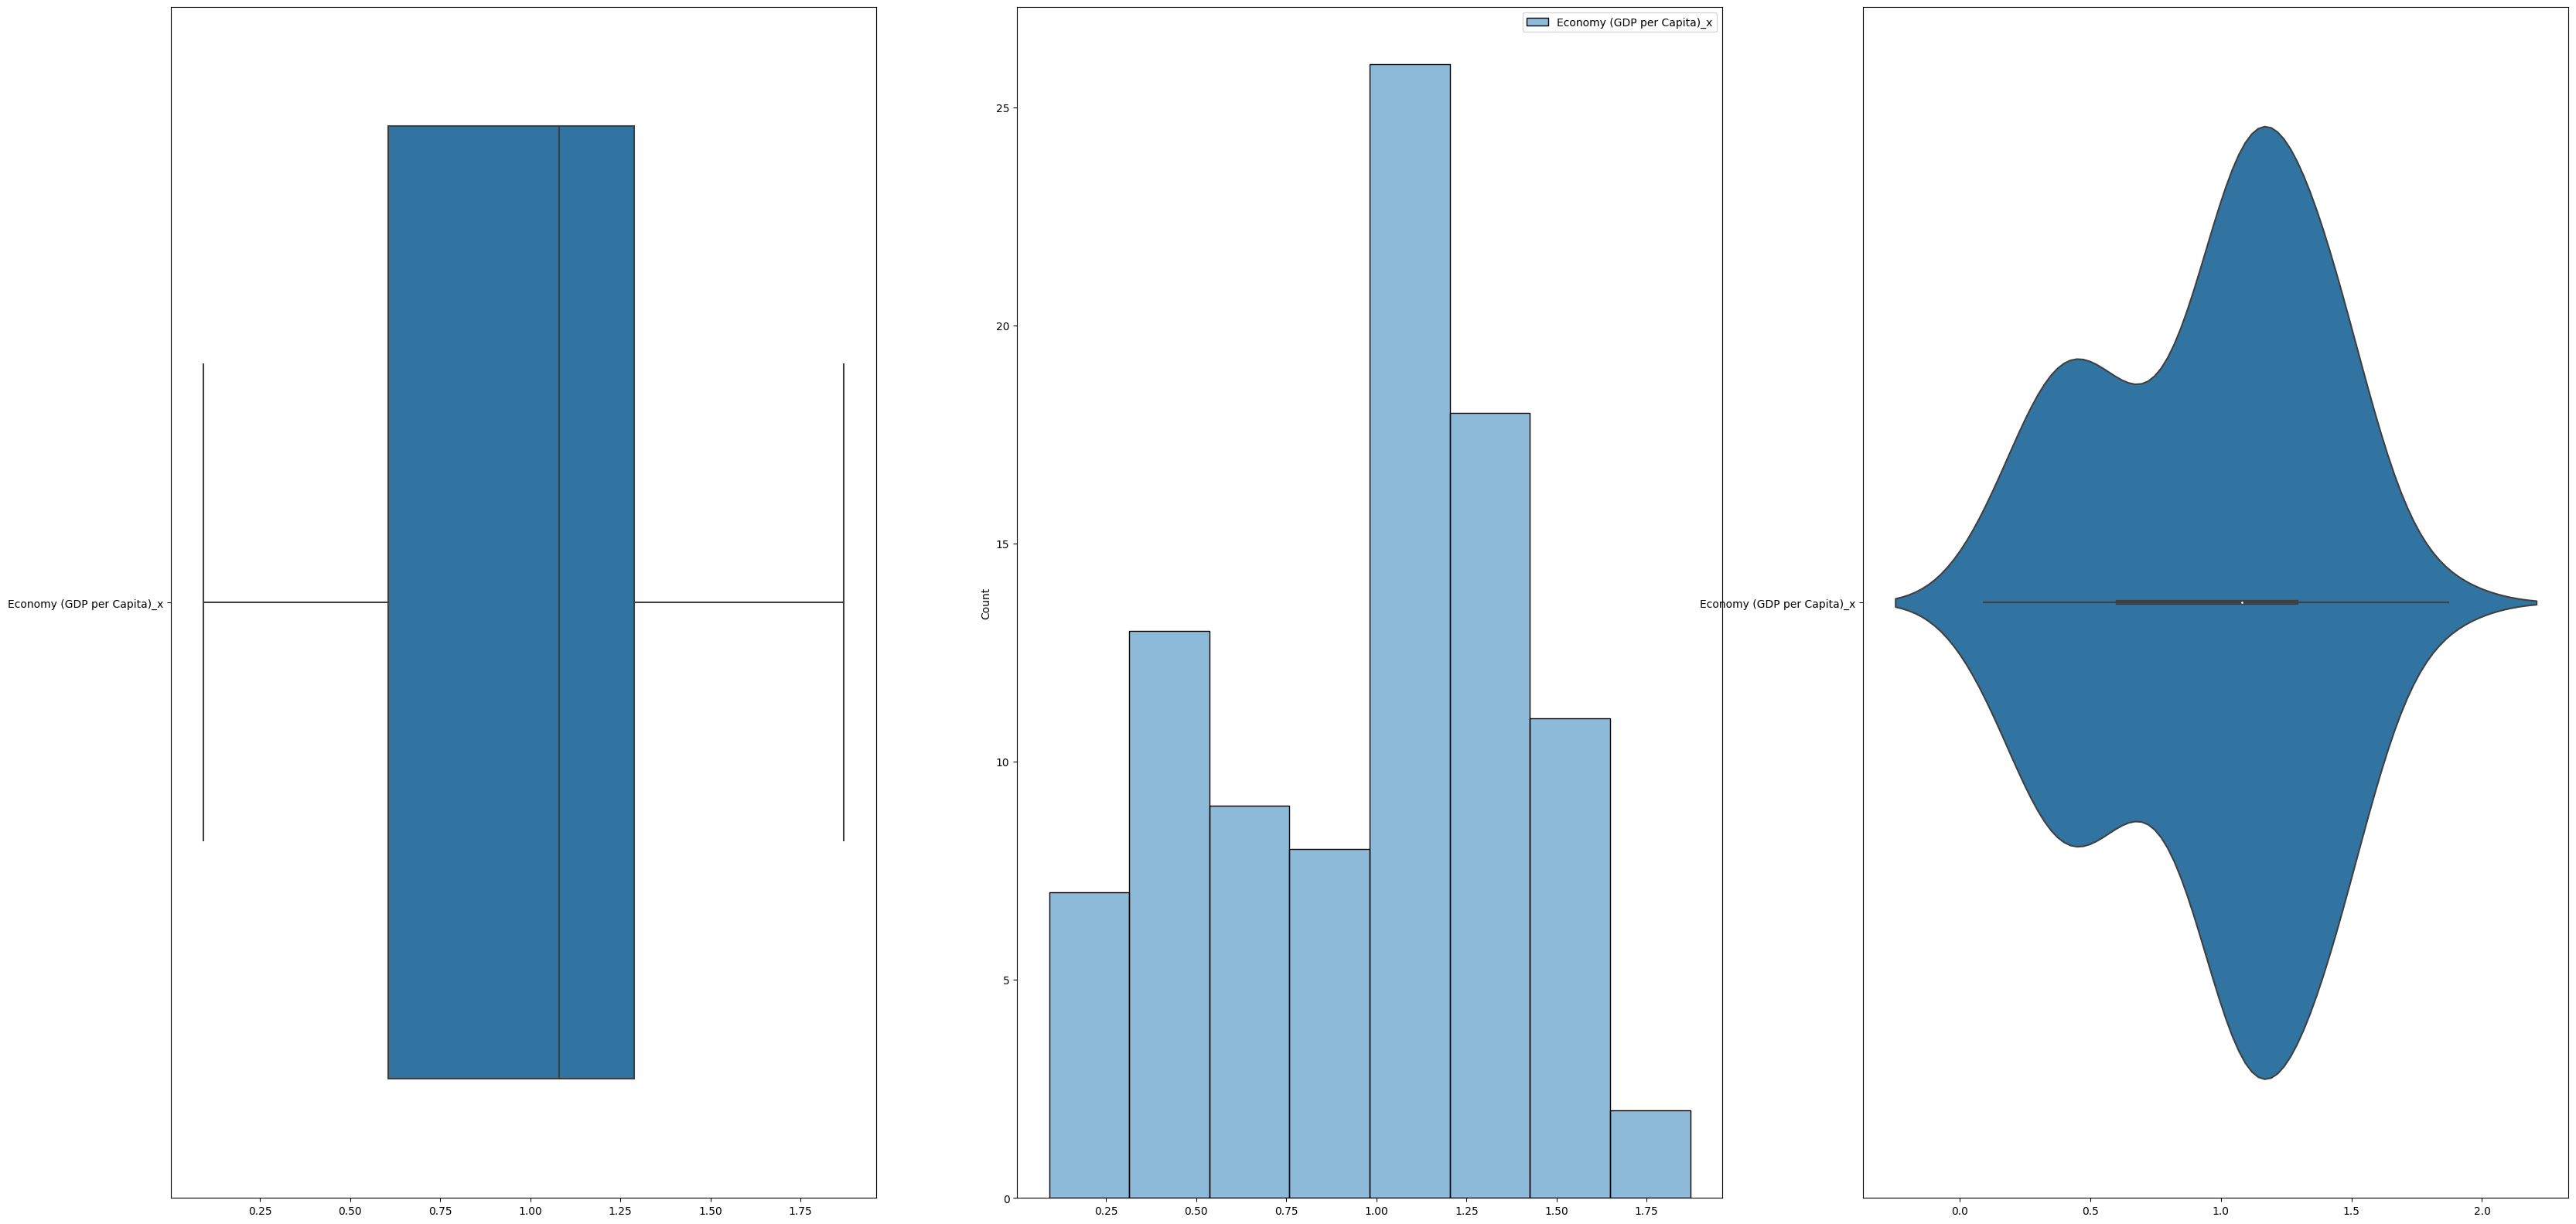

In [1545]:
# We then draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(40, 20))
sb.boxplot(data = y_train2017, orient = "h", ax = axes[0])
sb.histplot(data = y_train2017, ax = axes[1])
sb.violinplot(data = y_train2017, orient = "h", ax = axes[2])

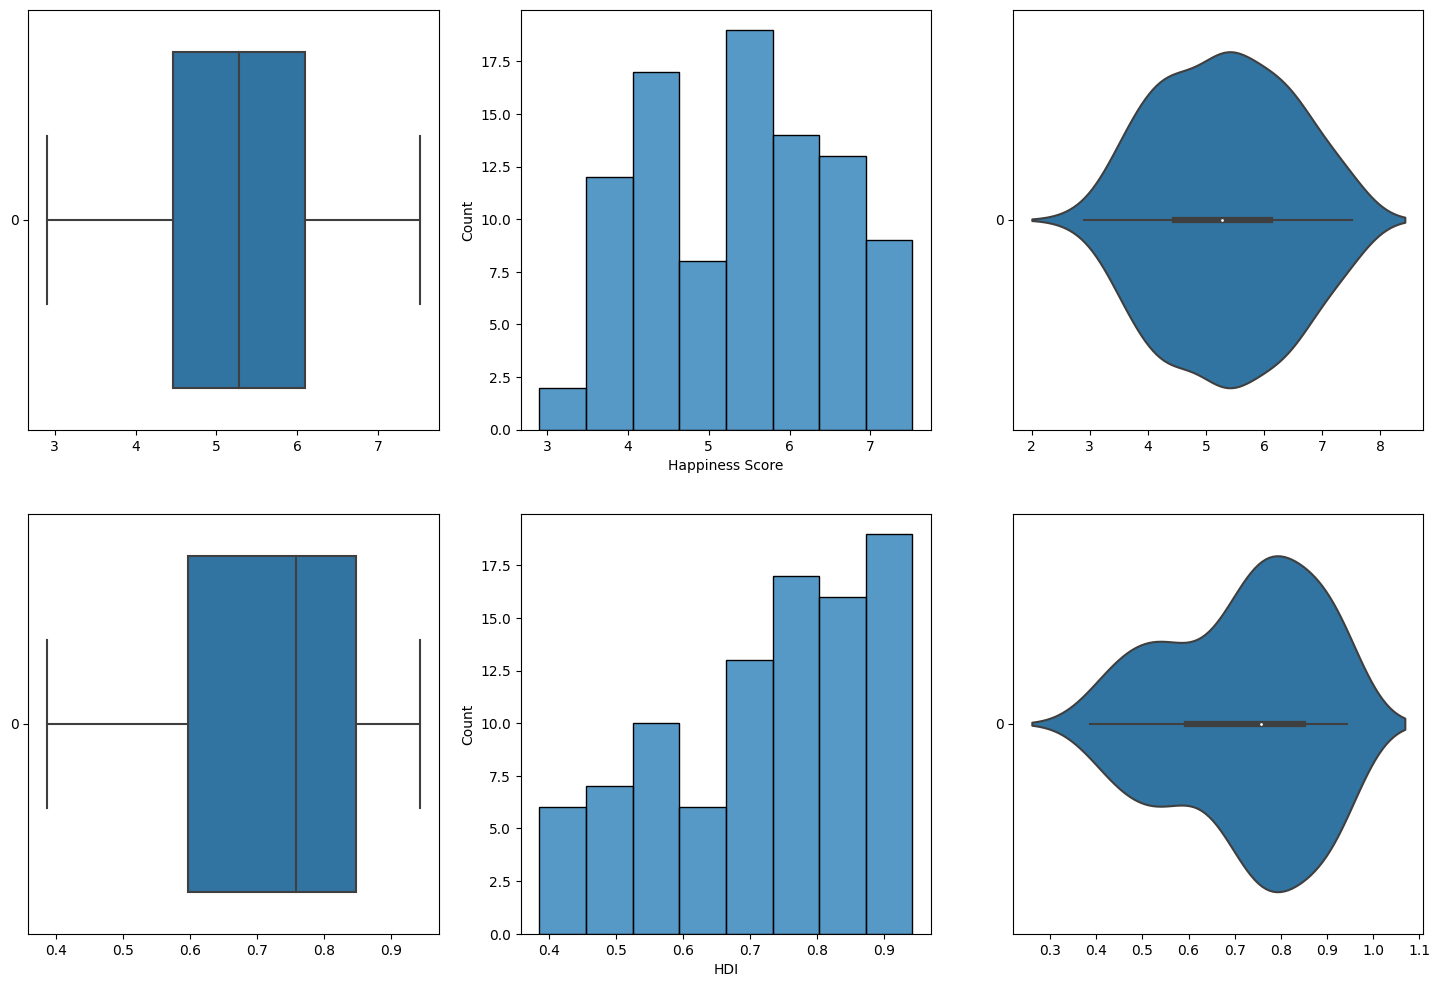

In [1546]:
# After that we draw the distributions of all Predictors
f, axes = plt.subplots(2, 3, figsize=(18, 12))

count = 0
for var in X_train2017:
    sb.boxplot(data = X_train2017[var], orient = "h", ax = axes[count, 0])
    sb.histplot(data = X_train2017[var], ax = axes[count, 1])
    sb.violinplot(data = X_train2017[var], orient = "h", ax = axes[count, 2])
    count += 1

<Axes: >

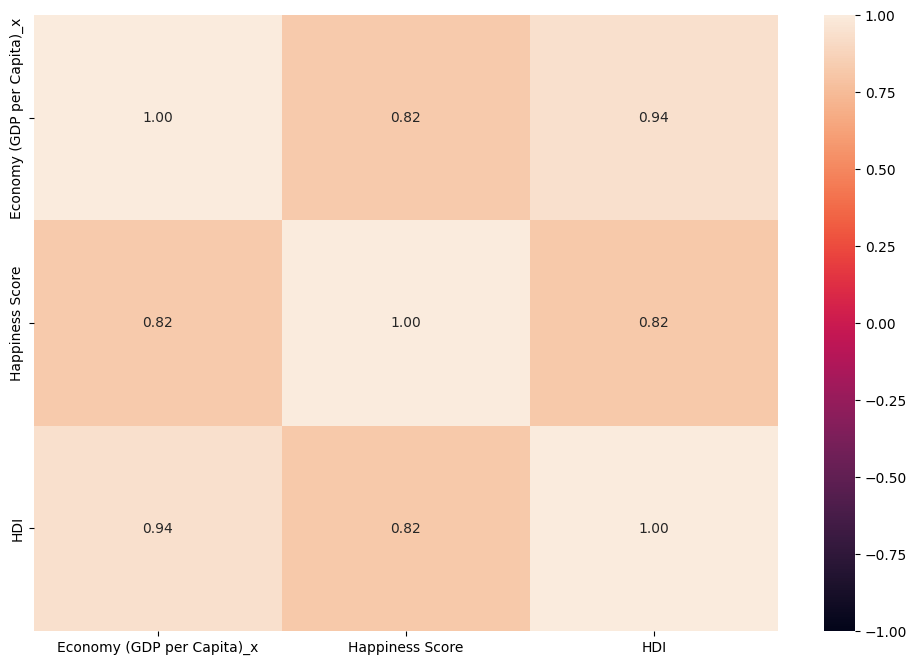

In [1547]:
# Now we make a heatmap to find the correlation between Response and the Predictors
trainDF2017 = pd.concat([y_train2017, X_train2017], axis = 1).reindex(y_train2017.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF2017.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")


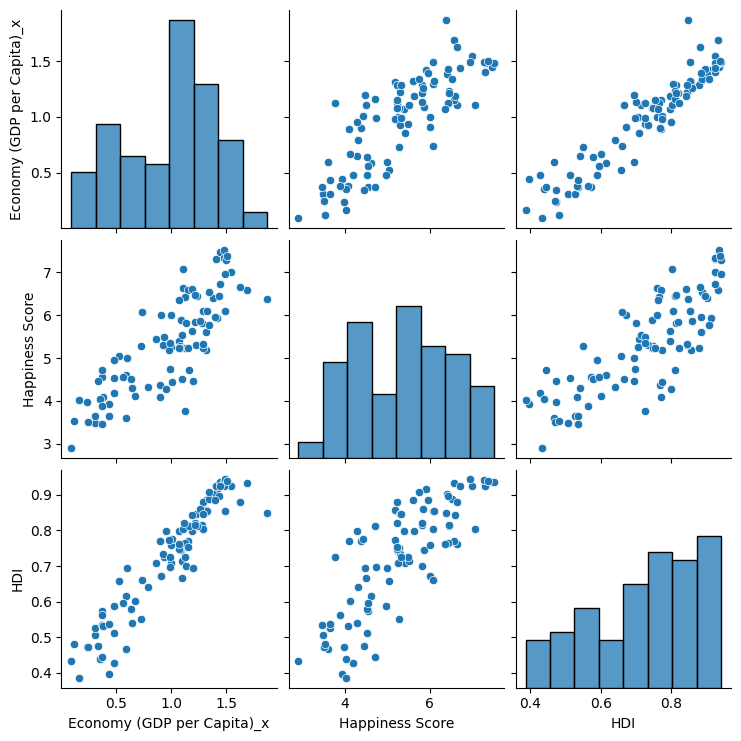

In [1548]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF2017)

## **Linear Regression using Scikit-Learn (2017 data)**

In [1549]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train2017, y_train2017)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train2017.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])


Intercept of Regression 	: b =  [-0.91752342]
Coefficients of Regression 	: a =  [[0.05710831 2.19280463]]



,Predictors,Coefficients
0,Happiness Score,0.057108
1,HDI,2.192805


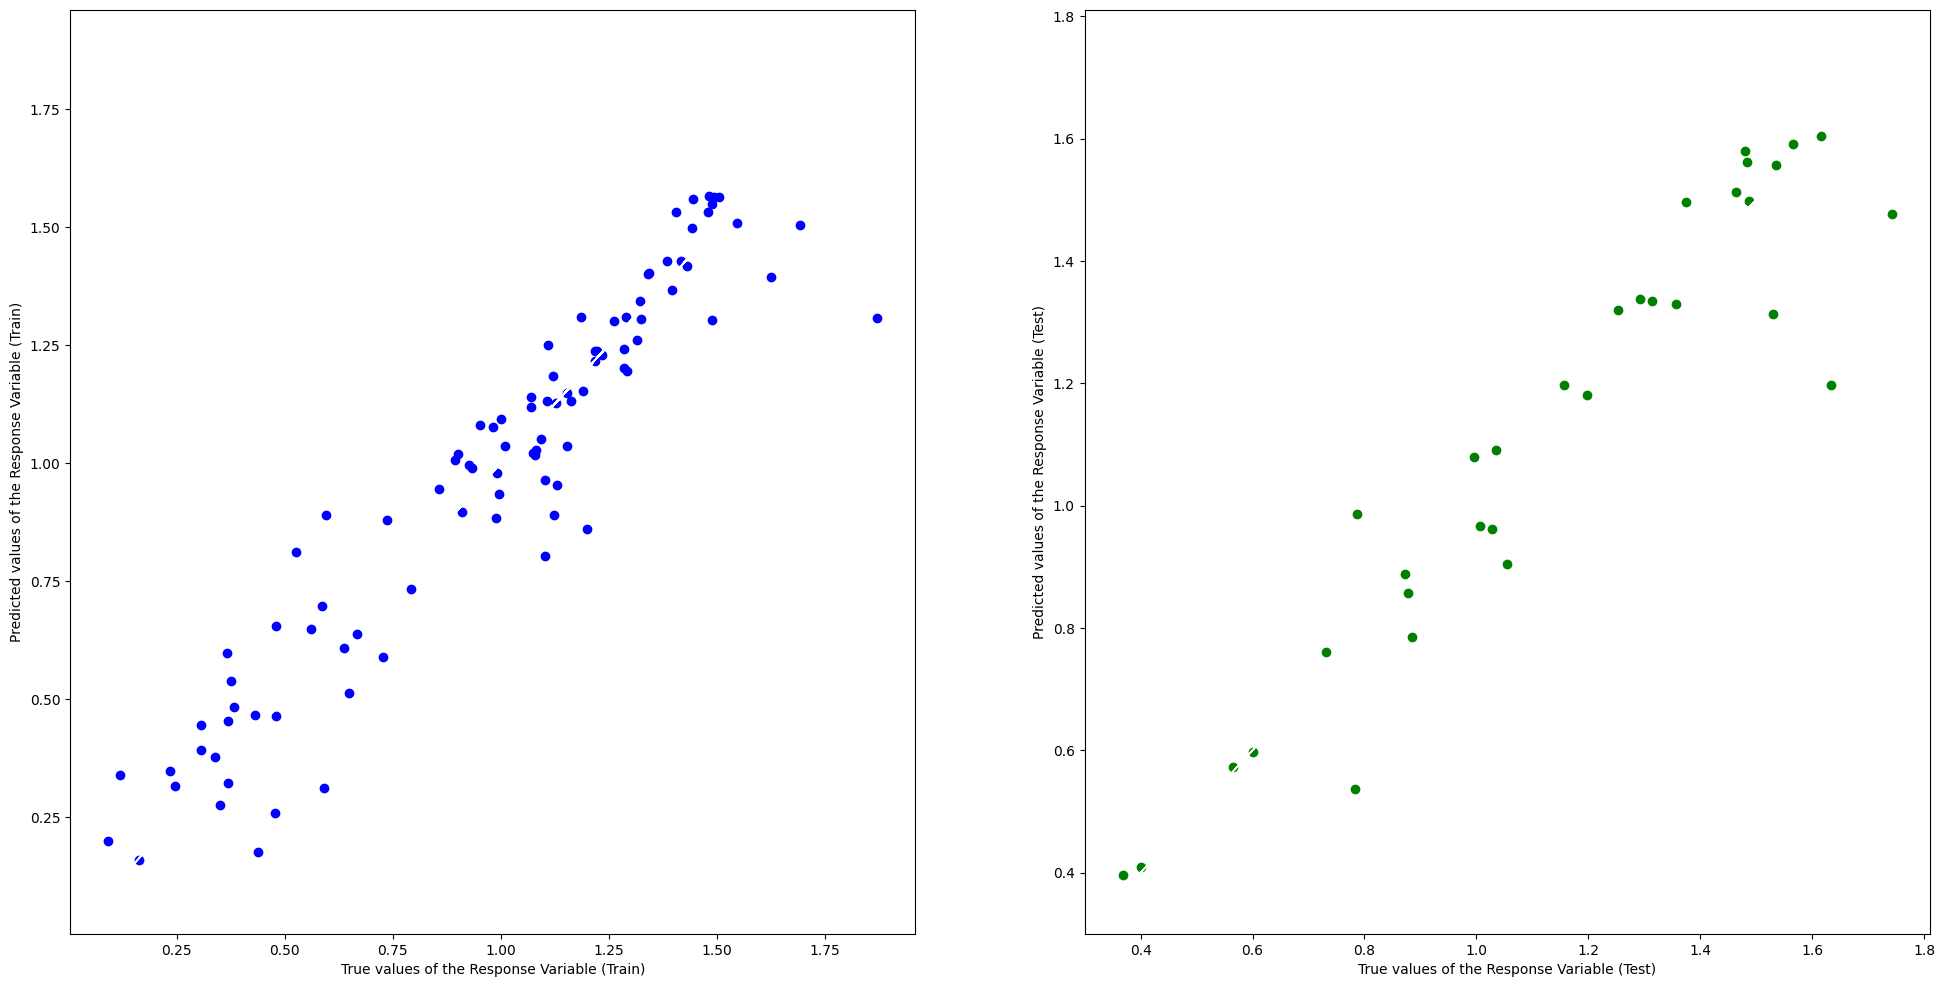

In [1550]:
# Predict the Total values from Predictors
y_train_pred2017 = linreg.predict(X_train2017)
y_test_pred2017 = linreg.predict(X_test2017)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train2017, y_train_pred2017, color = "blue")
axes[0].plot(y_train2017,y_train2017, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test2017, y_test_pred2017, color = "green")
axes[1].plot(y_test2017, y_test2017, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


## **Goodness of Fit (2017 data)**

In [1551]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train2017, y_train2017))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train2017, y_train_pred2017))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test2017, y_test2017))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test2017, y_test_pred2017))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8955598743164718
Mean Squared Error (MSE) 	: 0.01804667252242537

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8855624417226315
Mean Squared Error (MSE) 	: 0.015769677206359457



# **Multi-Variate Linear Regression on the 2018 data**

In [1552]:
#Merging all dataframes
MERGED2018 = GDP_2018.merge(HI_2018, on='Country').merge(HDI_2018, on='Country')
MERGED2018.head()

,Economy (GDP per Capita)_x,Overall rank,Happiness Score,Economy (GDP per Capita)_y,Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),HDI
Country,,,,,,,,,,
Afghanistan,0.332,145,3.632,0.332,0.537,0.255,0.085,0.191,0.036,0.509
Albania,0.916,112,4.586,0.916,0.817,0.790,0.419,0.149,0.032,0.792
Algeria,0.979,84,5.295,0.979,1.154,0.687,0.077,0.055,0.135,0.746
Argentina,1.073,29,6.388,1.073,1.468,0.744,0.570,0.062,0.054,0.842
Armenia,0.816,129,4.321,0.816,0.990,0.666,0.260,0.077,0.028,0.771


In [1553]:
#Extracting the Response and Predictors
y = pd.DataFrame(MERGED2018["Economy (GDP per Capita)_x"])
X = pd.DataFrame(MERGED2018[["Happiness Score", "HDI"]])

Split the dataset in Train and Test sets, uniformly at random. Train Set with 80% of data and Test Set with 20% of data.

In [1554]:
# Split the Dataset into Train and Test
X_train2018, X_test2018, y_train2018, y_test2018 = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set for 2018:", y_train2018.shape, X_train2018.shape)
print("Test Set for 2018:", y_test2018.shape, X_test2018.shape)

Train Set for 2018: (94, 1) (94, 2)
Test Set for 2018: (32, 1) (32, 2)


## **Basic Exploration (2018 data)**

Perform basic statistical exploration and visualization on the Train Set.

In [1555]:
# Summary Statistics for Response
y_train2018.describe()

,Economy (GDP per Capita)_x
count,94.000000
mean,0.932649
std,0.373648
min,0.076000
25%,0.696500
50%,0.980500
75%,1.197000
max,2.096000


In [1556]:
# Summary Statistics for Predictors
X_train2018.describe()

,Happiness Score,HDI
count,94.000000,94.000000
mean,5.480511,0.743202
std,1.092148,0.143849
min,3.408000,0.391000
25%,4.521500,0.651000
50%,5.441000,0.767500
75%,6.355750,0.851500
max,7.632000,0.956000


<Axes: >

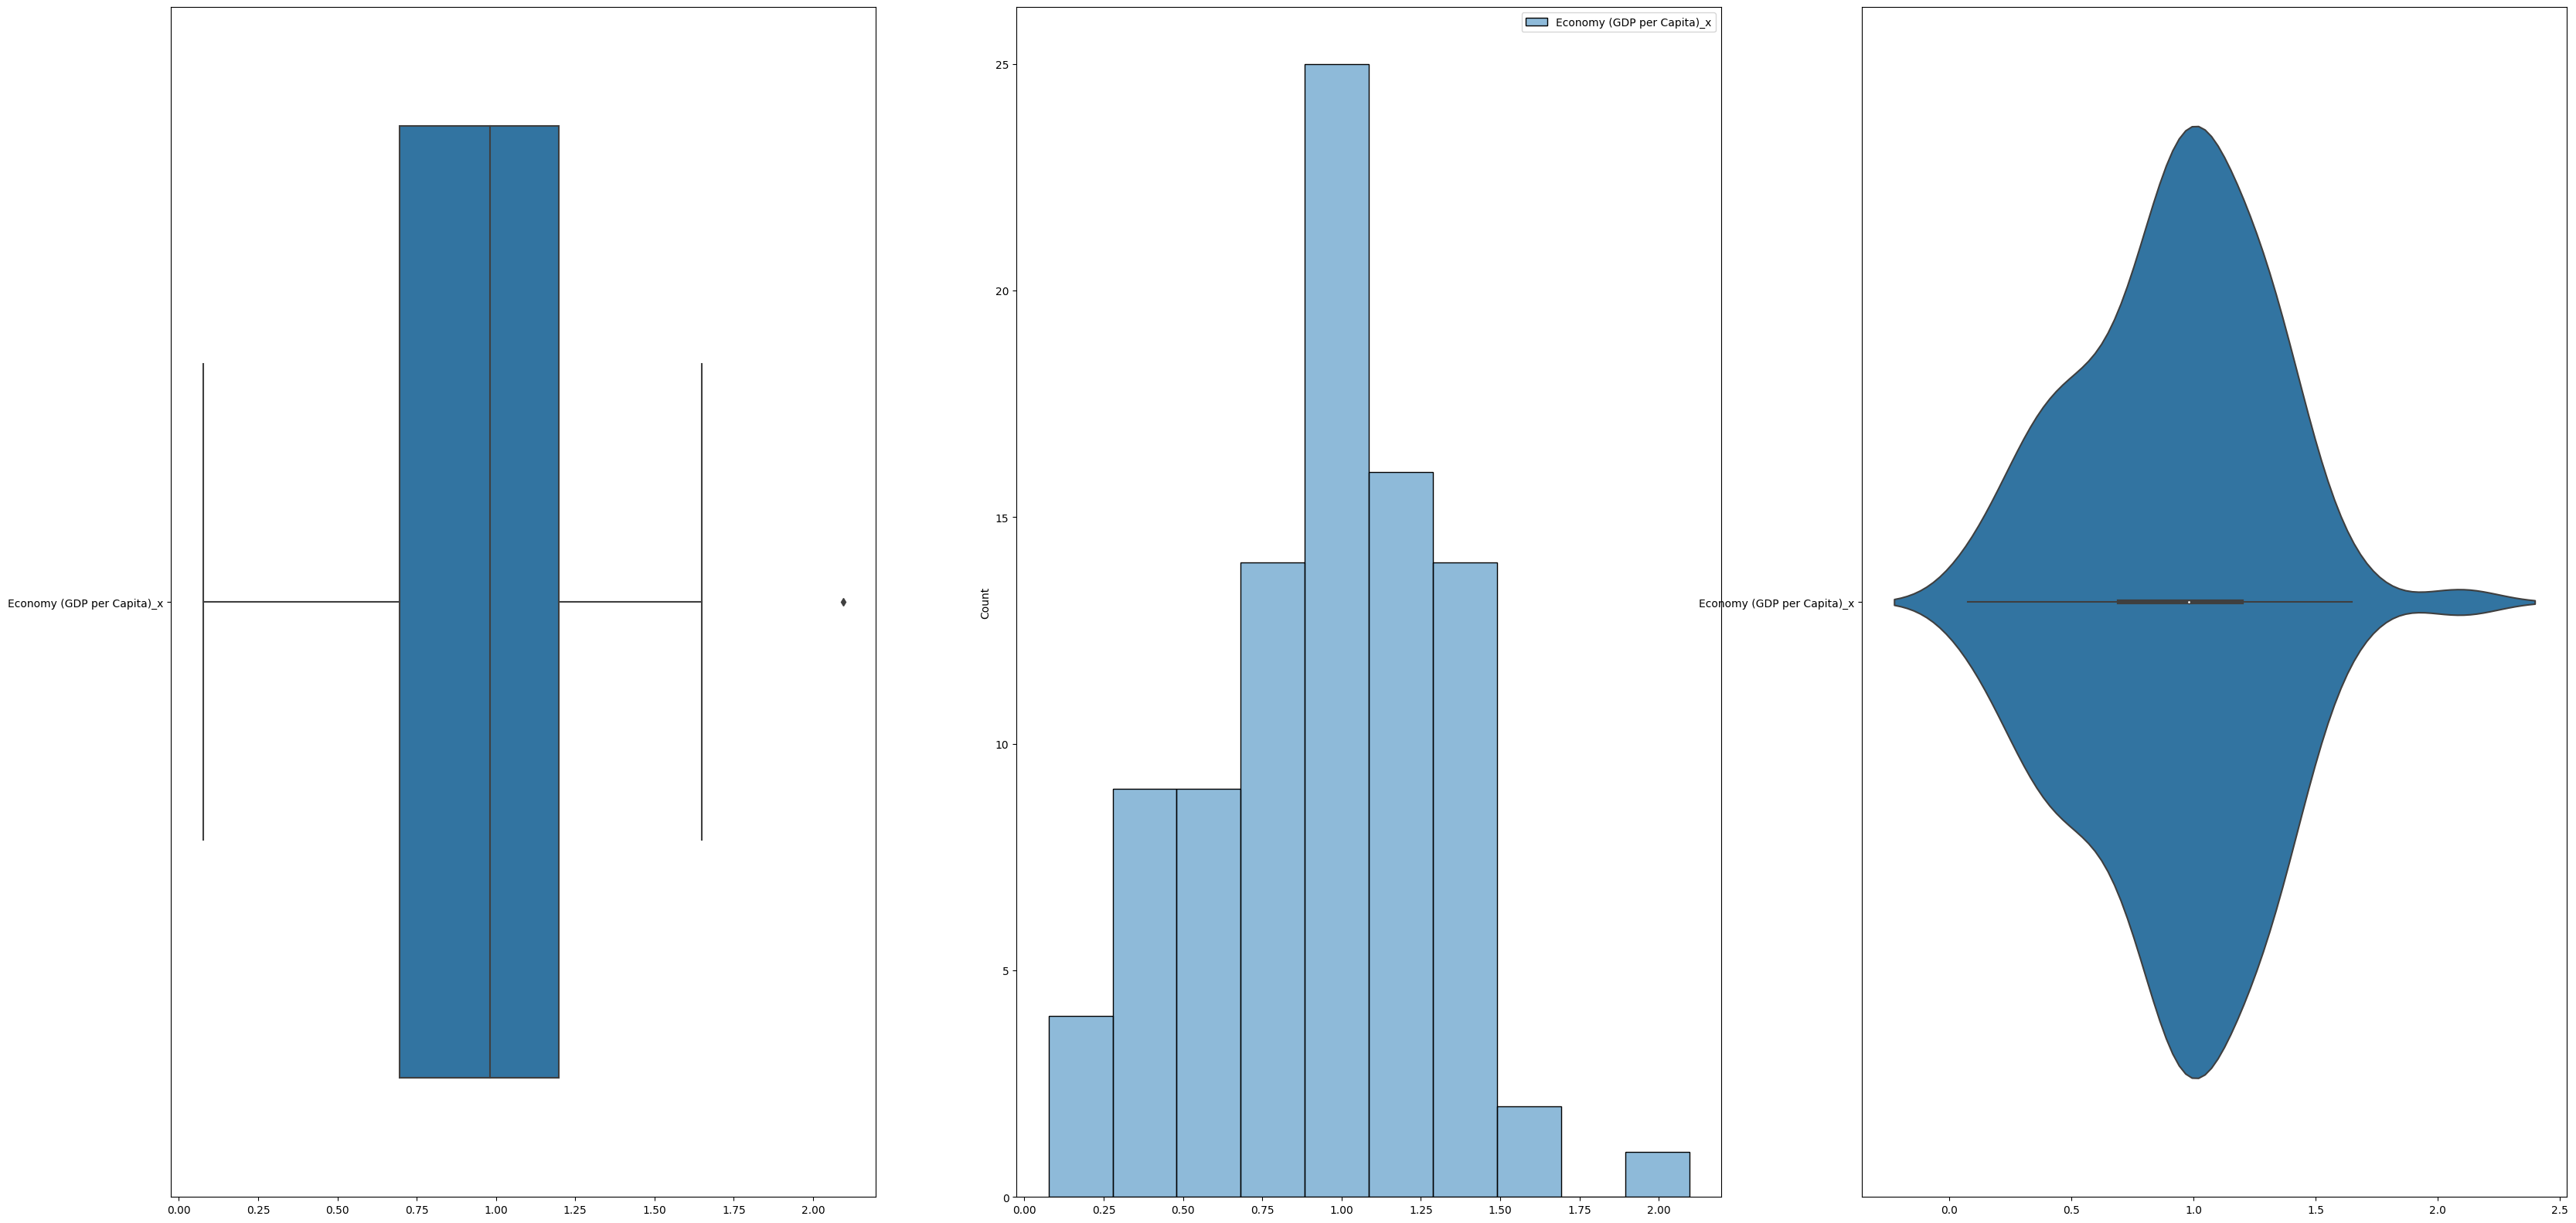

In [1557]:
# We then draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(40, 20))
sb.boxplot(data = y_train2018, orient = "h", ax = axes[0])
sb.histplot(data = y_train2018, ax = axes[1])
sb.violinplot(data = y_train2018, orient = "h", ax = axes[2])

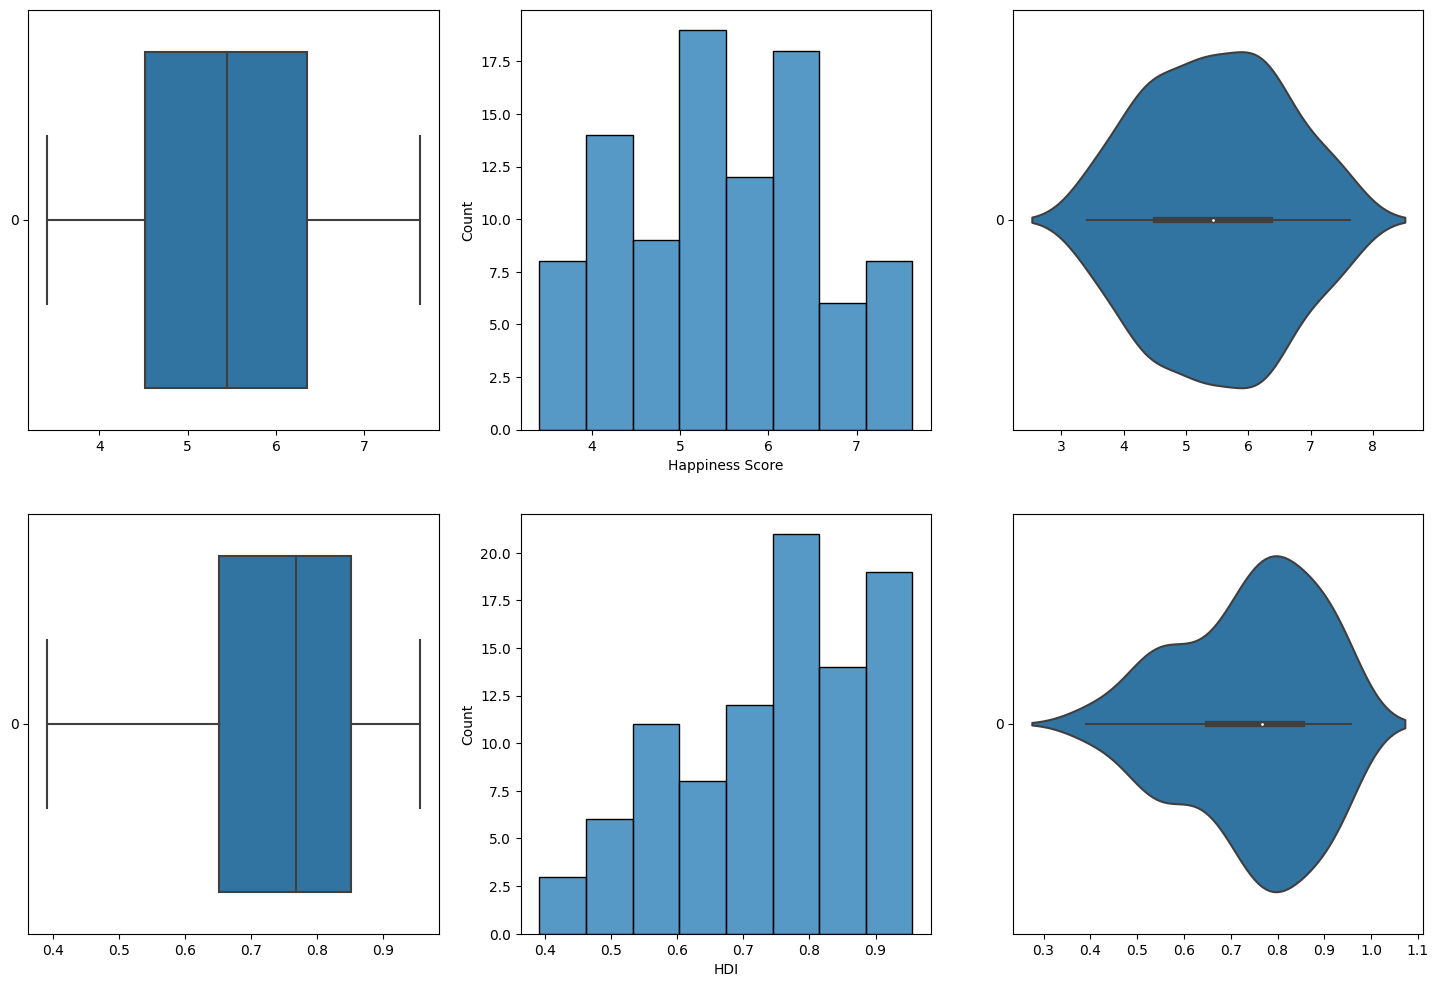

In [1558]:
# After that we draw the distributions of all Predictors
f, axes = plt.subplots(2, 3, figsize=(18, 12))

count = 0
for var in X_train2018:
    sb.boxplot(data = X_train2018[var], orient = "h", ax = axes[count, 0])
    sb.histplot(data = X_train2018[var], ax = axes[count, 1])
    sb.violinplot(data = X_train2018[var], orient = "h", ax = axes[count, 2])
    count += 1

<Axes: >

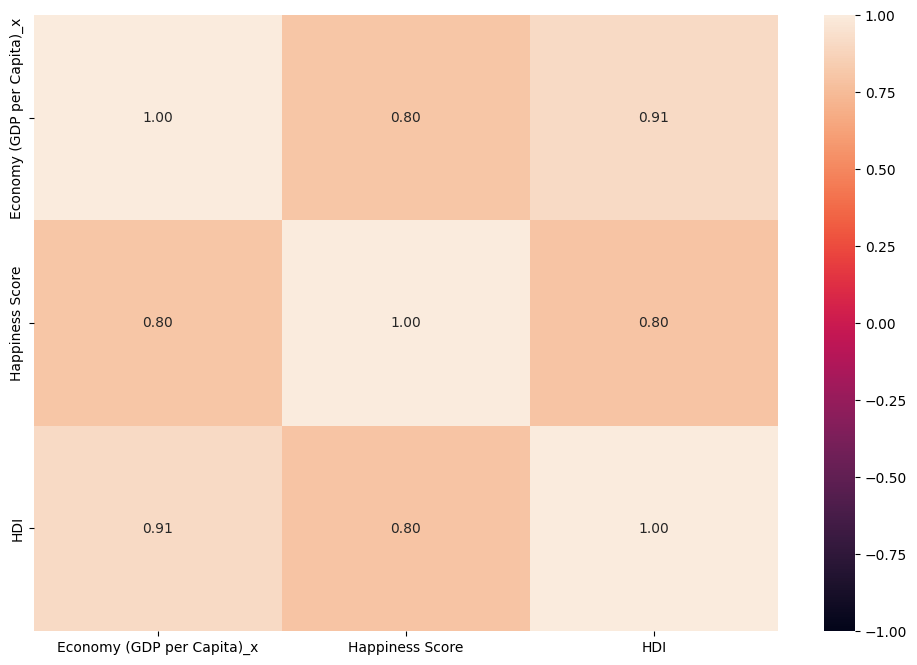

In [1559]:
# Now we make a heatmap to find the correlation between Response and the Predictors
trainDF2018 = pd.concat([y_train2018, X_train2018], axis = 1).reindex(y_train2018.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF2018.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")


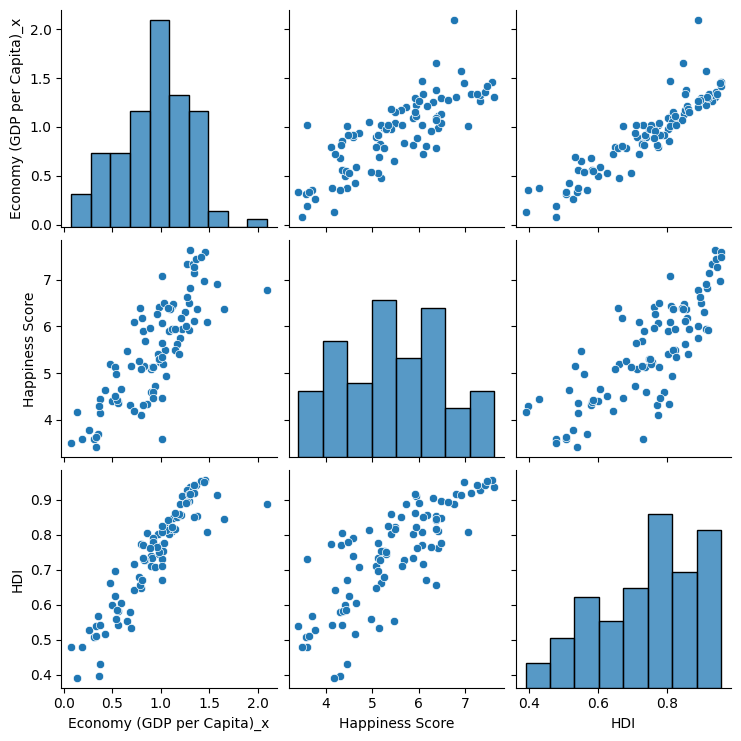

In [1560]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF2018)

## **Linear Regression using Scikit-Learn (2018 data)**

In [1561]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train2018, y_train2018)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train2018.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])


Intercept of Regression 	: b =  [-0.89814365]
Coefficients of Regression 	: a =  [[0.06927219 1.95255848]]



,Predictors,Coefficients
0,Happiness Score,0.069272
1,HDI,1.952558


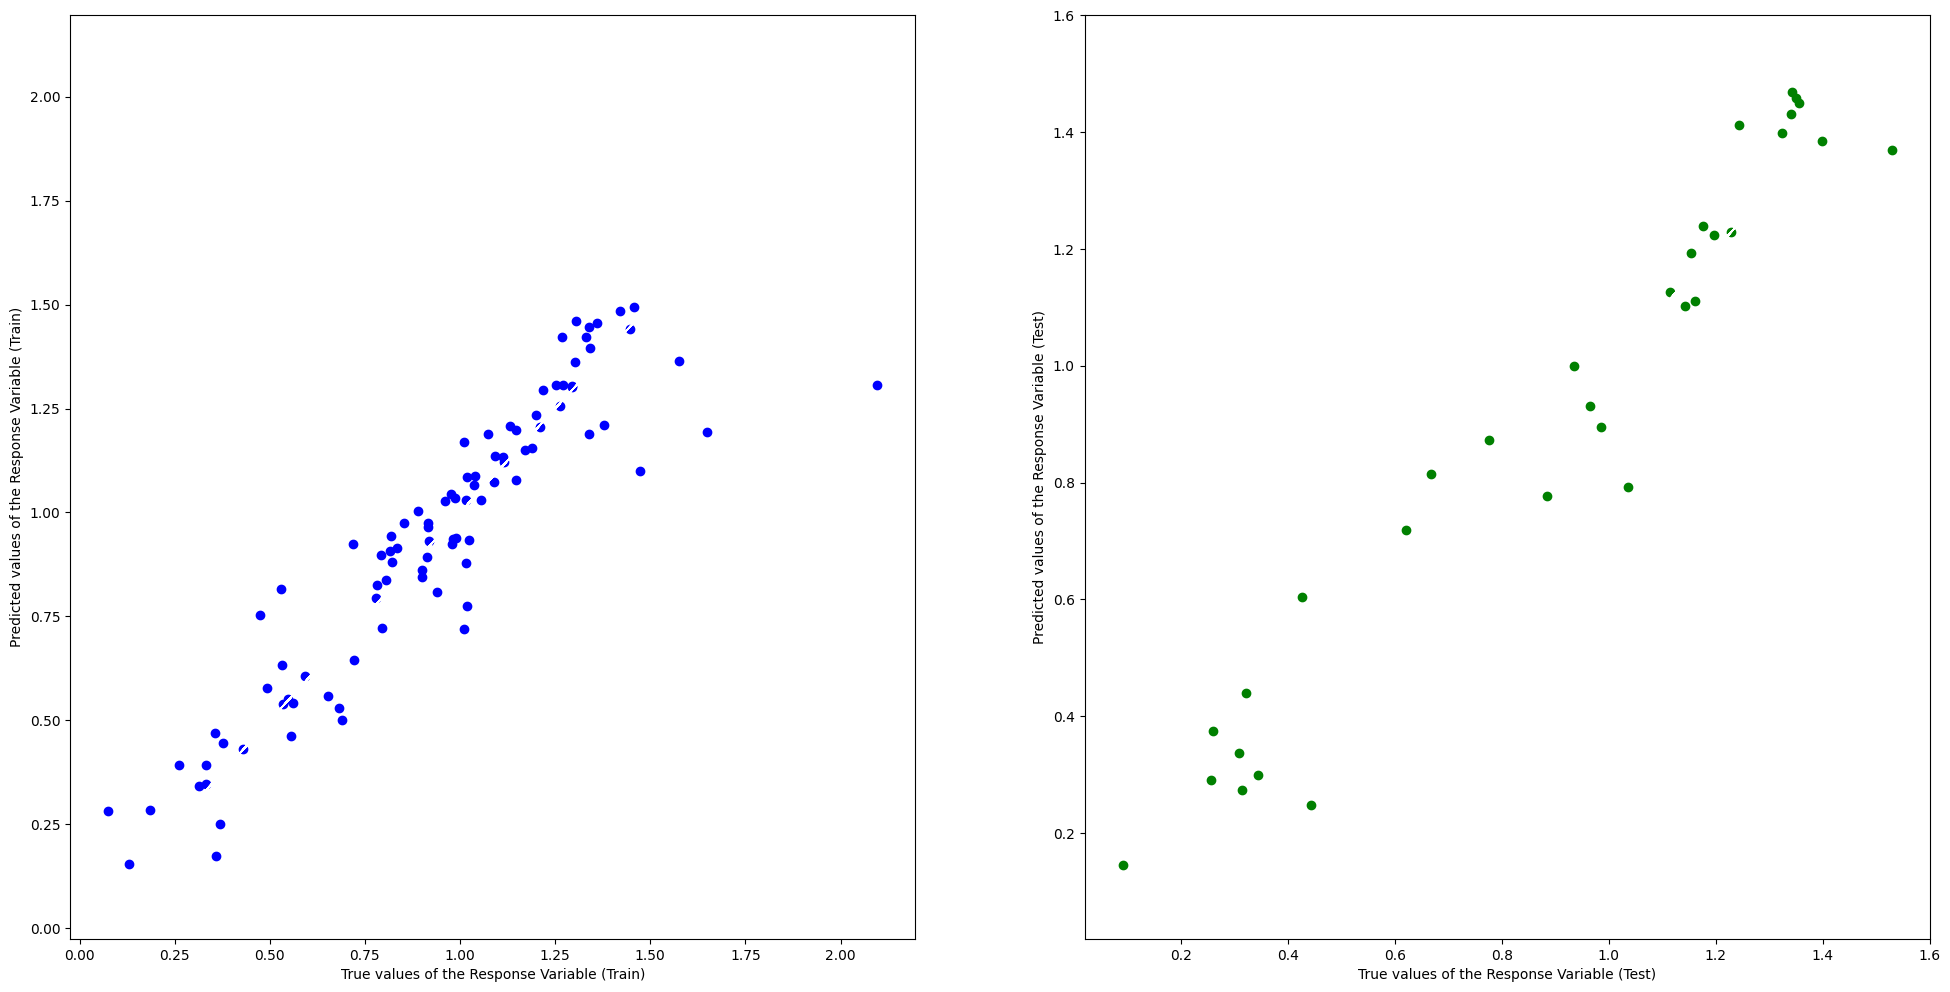

In [1562]:
# Predict the Total values from Predictors
y_train_pred2018 = linreg.predict(X_train2018)
y_test_pred2018 = linreg.predict(X_test2018)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train2018, y_train_pred2018, color = "blue")
axes[0].plot(y_train2018,y_train2018, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test2018, y_test_pred2018, color = "green")
axes[1].plot(y_test2018, y_test2018, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


## **Goodness of Fit (2018 data)**

In [1563]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train2018, y_train2018))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train2018, y_train_pred2018))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test2018, y_test2018))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test2018, y_test_pred2018))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8483601346123164
Mean Squared Error (MSE) 	: 0.02094567166582079

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9392672394307863
Mean Squared Error (MSE) 	: 0.01078750476420516



# **Multi-Variate Linear Regression on the 2019 data**

In [1564]:
#Merging all dataframes
MERGED2019 = GDP_2019.merge(HI_2019, on='Country').merge(HDI_2019, on='Country')
MERGED2019.head()

,Economy (GDP per Capita)_x,Overall rank,Happiness Score,Economy (GDP per Capita)_y,Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),HDI
Country,,,,,,,,,,
Afghanistan,0.350,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0.511
Albania,0.947,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027,0.795
Algeria,1.002,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114,0.748
Argentina,1.092,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050,0.845
Armenia,0.850,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064,0.776


In [1565]:
#Extracting the Response and Predictors
y = pd.DataFrame(MERGED2019["Economy (GDP per Capita)_x"])
X = pd.DataFrame(MERGED2019[["Happiness Score", "HDI"]])

Split the dataset in Train and Test sets, uniformly at random. Train Set with 80% of data and Test Set with 20% of data.

In [1566]:
# Split the Dataset into Train and Test
X_train2019, X_test2019, y_train2019, y_test2019 = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set for 2019:", y_train2019.shape, X_train2019.shape)
print("Test Set for 2019:", y_test2019.shape, X_test2019.shape)

Train Set for 2019: (94, 1) (94, 2)
Test Set for 2019: (32, 1) (32, 2)


## **Basic Exploration (2019 data)**

Perform basic statistical exploration and visualization on the Train Set.

In [1567]:
# Summary Statistics for Response
y_train2019.describe()

,Economy (GDP per Capita)_x
count,94.000000
mean,0.921362
std,0.391226
min,0.046000
25%,0.618750
50%,0.994500
75%,1.217250
max,1.609000


In [1568]:
# Summary Statistics for Predictors
X_train2019.describe()

,Happiness Score,HDI
count,94.000000,94.000000
mean,5.455362,0.737489
std,1.108152,0.153106
min,3.203000,0.394000
25%,4.646000,0.616250
50%,5.356000,0.762000
75%,6.212750,0.861500
max,7.600000,0.957000


<Axes: >

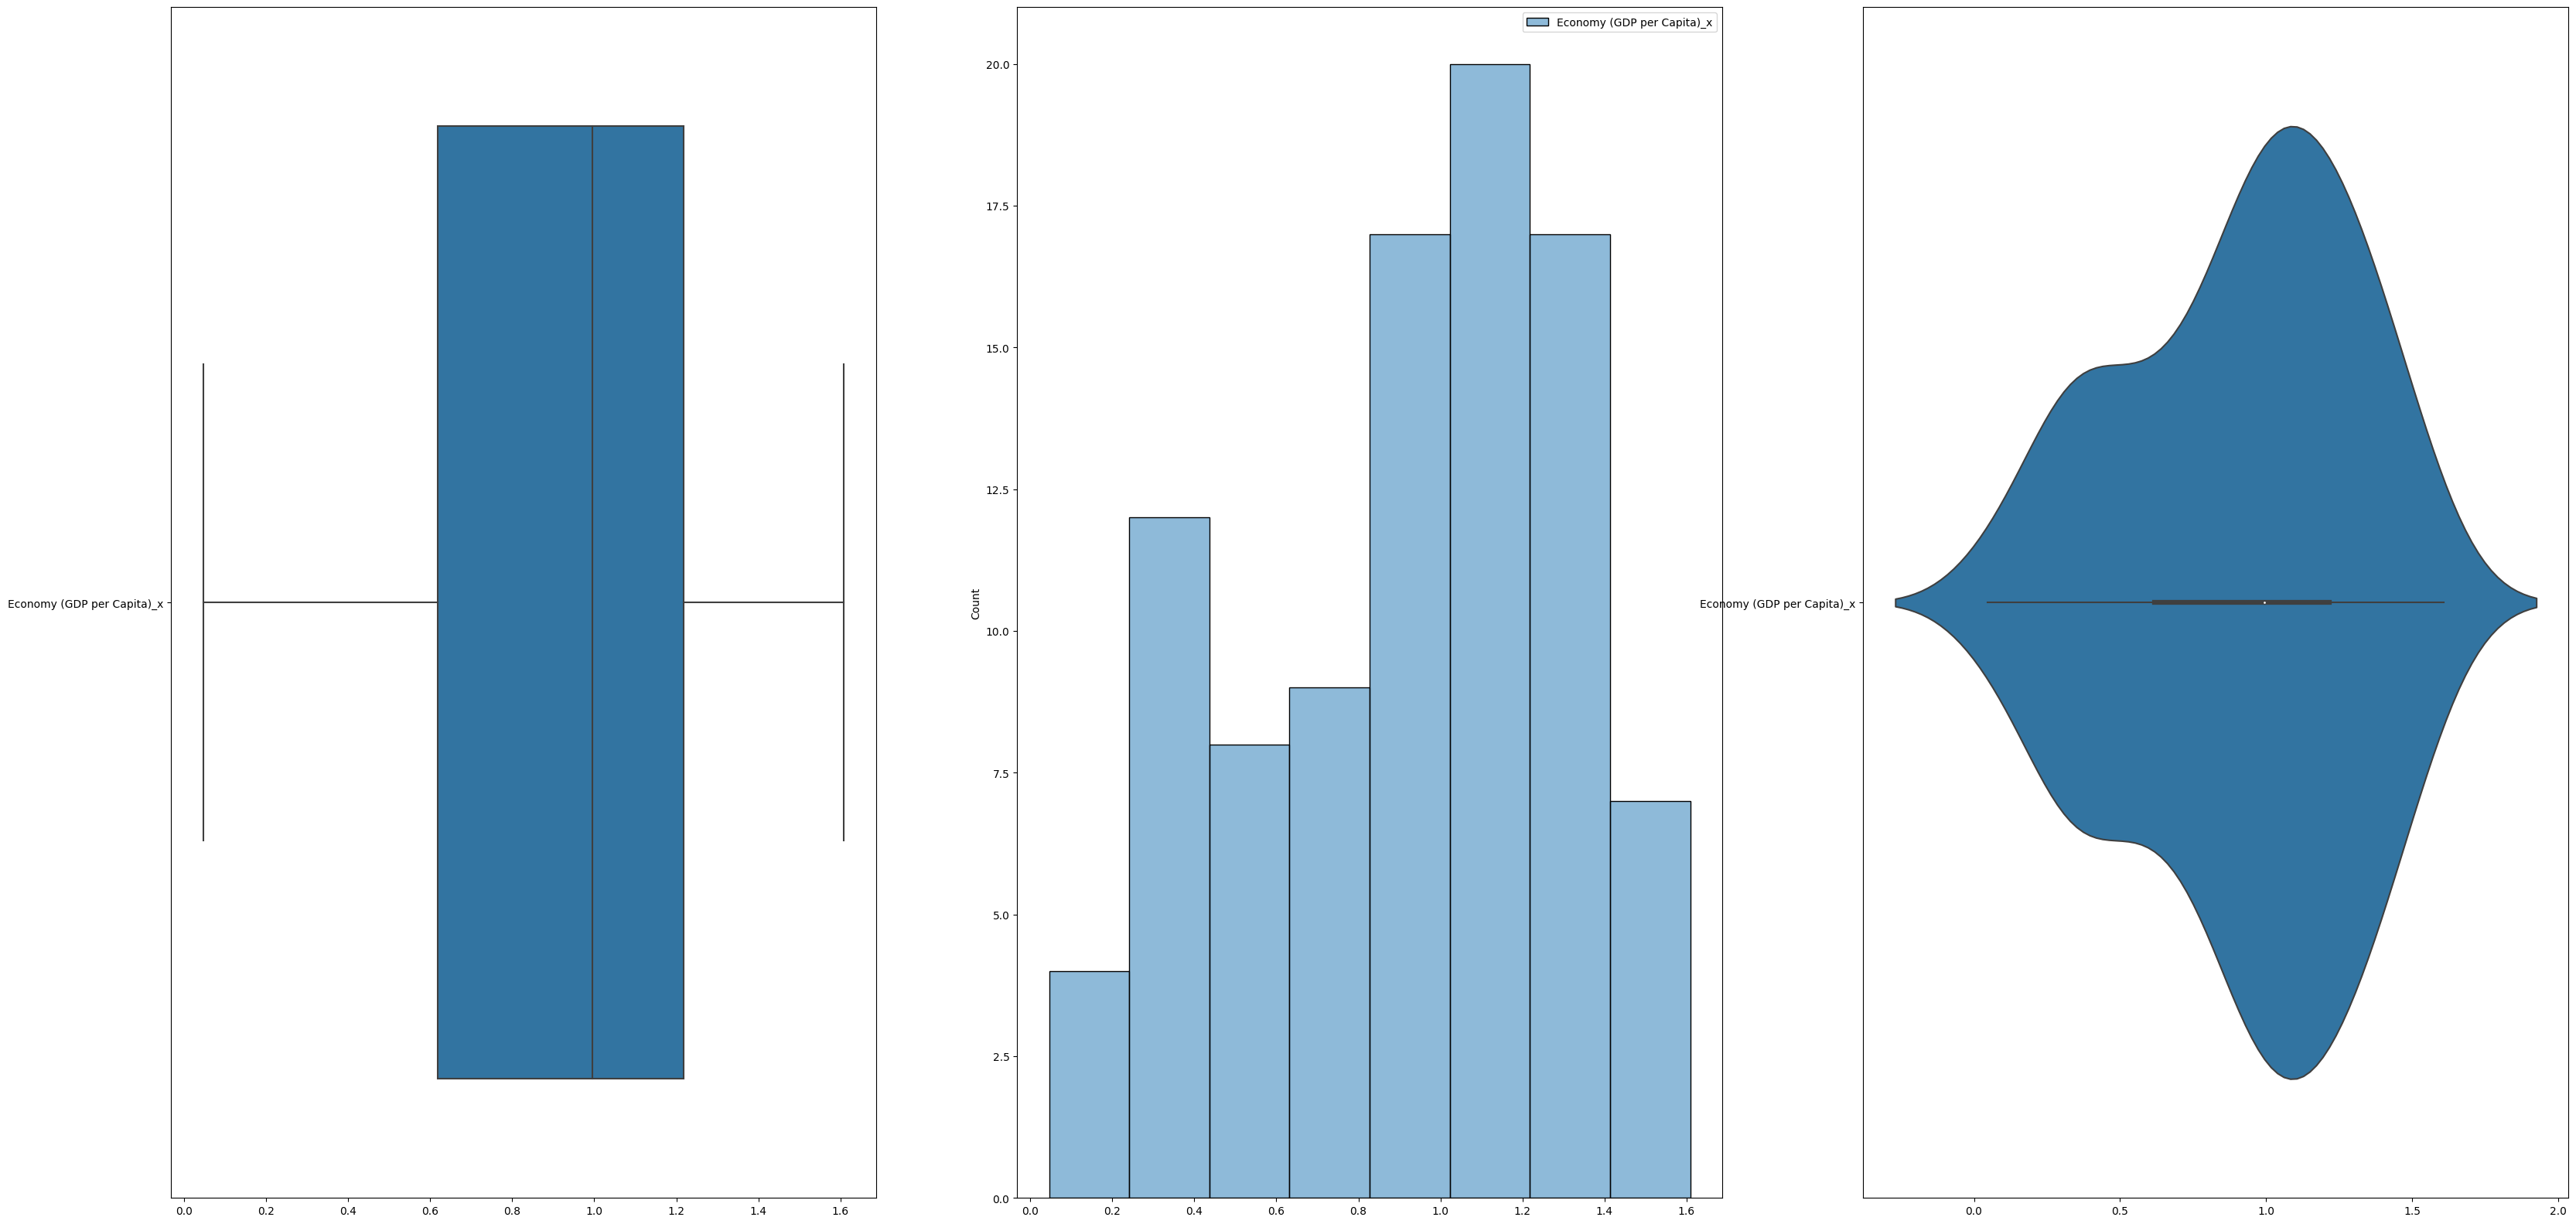

In [1569]:
# We then draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(40, 20))
sb.boxplot(data = y_train2019, orient = "h", ax = axes[0])
sb.histplot(data = y_train2019, ax = axes[1])
sb.violinplot(data = y_train2019, orient = "h", ax = axes[2])

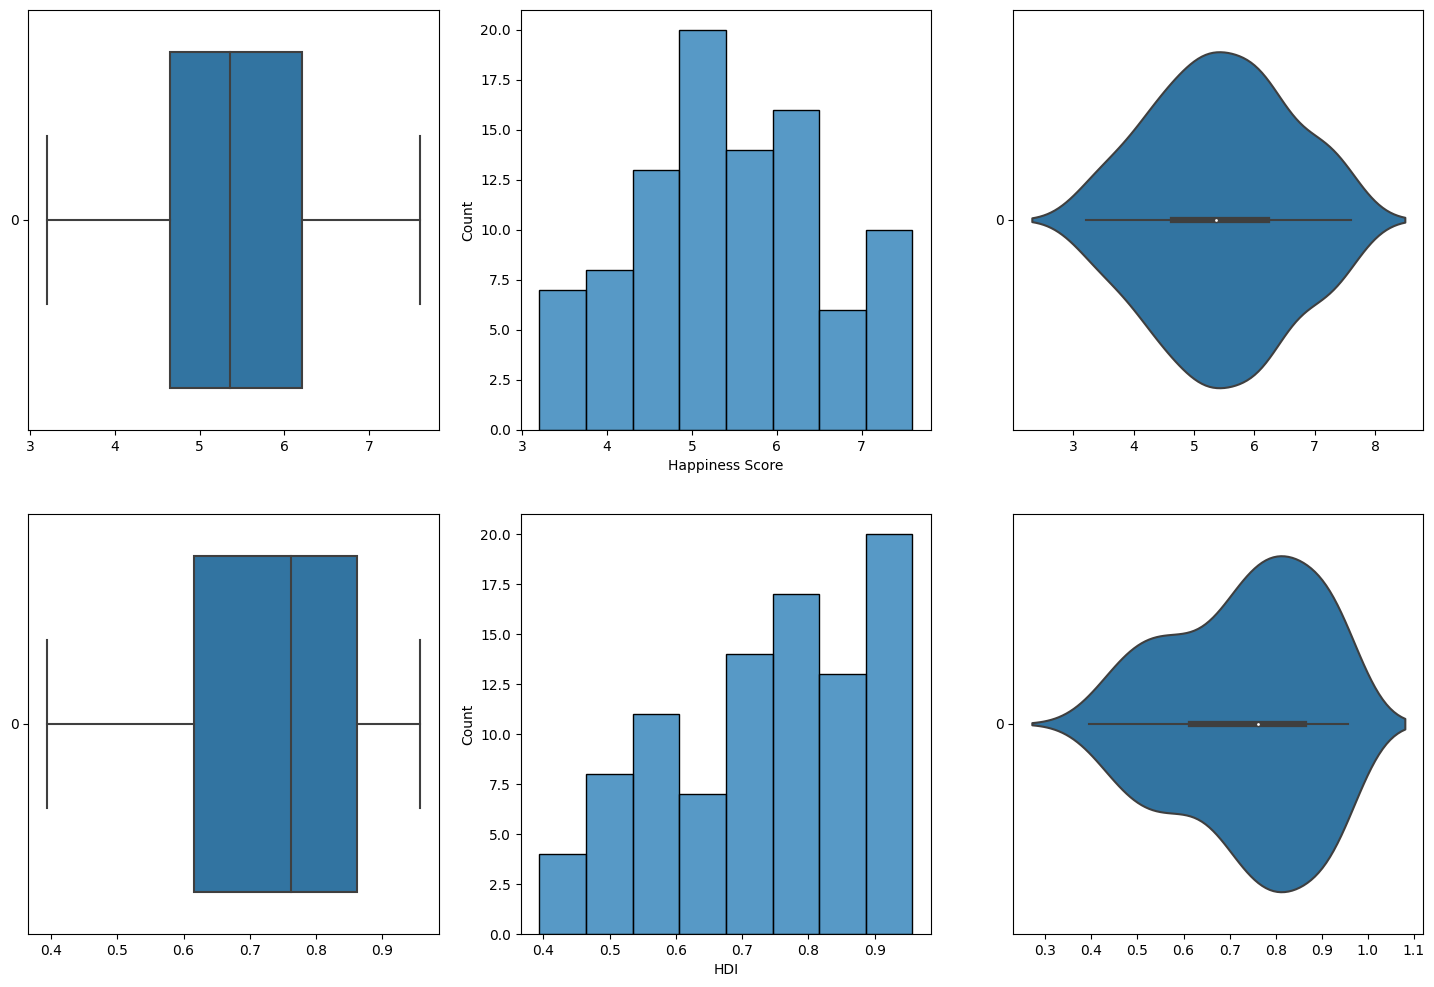

In [1570]:
# After that we draw the distributions of all Predictors
f, axes = plt.subplots(2, 3, figsize=(18, 12))

count = 0
for var in X_train2019:
    sb.boxplot(data = X_train2019[var], orient = "h", ax = axes[count, 0])
    sb.histplot(data = X_train2019[var], ax = axes[count, 1])
    sb.violinplot(data = X_train2019[var], orient = "h", ax = axes[count, 2])
    count += 1

<Axes: >

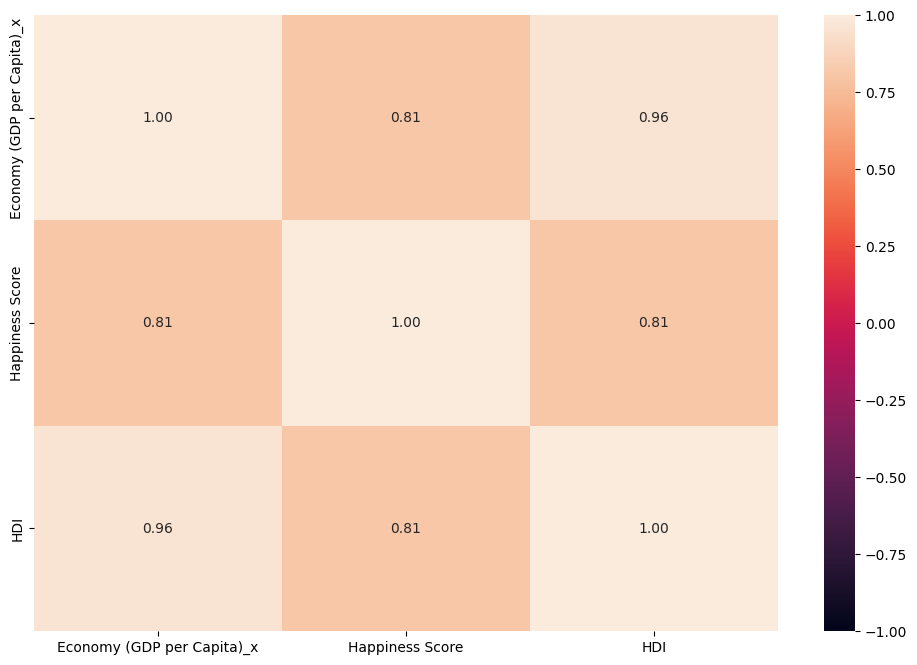

In [1571]:
# Now we make a heatmap to find the correlation between Response and the Predictors
trainDF2019 = pd.concat([y_train2019, X_train2019], axis = 1).reindex(y_train2019.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF2019.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")


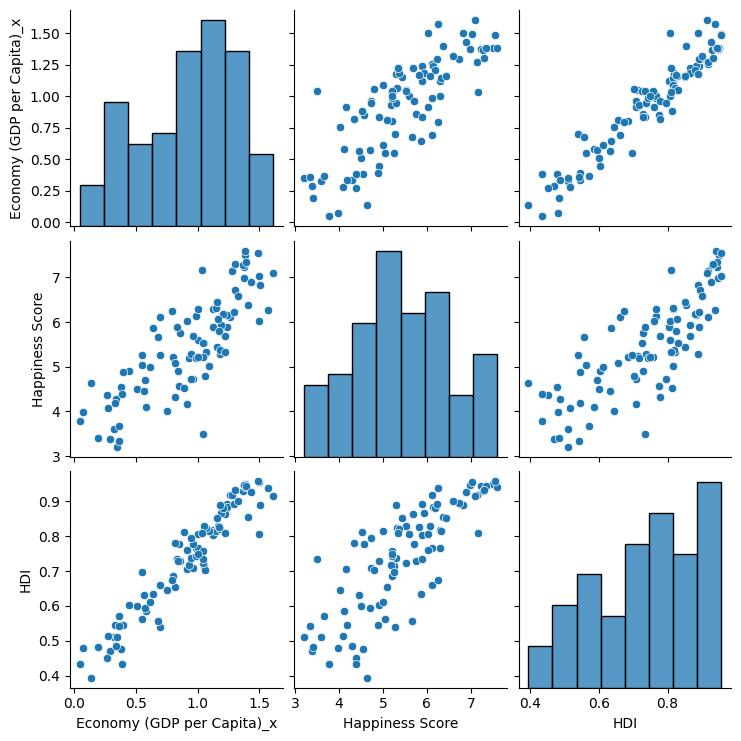

In [1572]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF2019)

## **Linear Regression using Scikit-Learn (2019 data)**

In [1573]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train2019, y_train2019)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train2019.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])


Intercept of Regression 	: b =  [-0.92748525]
Coefficients of Regression 	: a =  [[0.03918008 2.21712412]]



,Predictors,Coefficients
0,Happiness Score,0.039180
1,HDI,2.217124


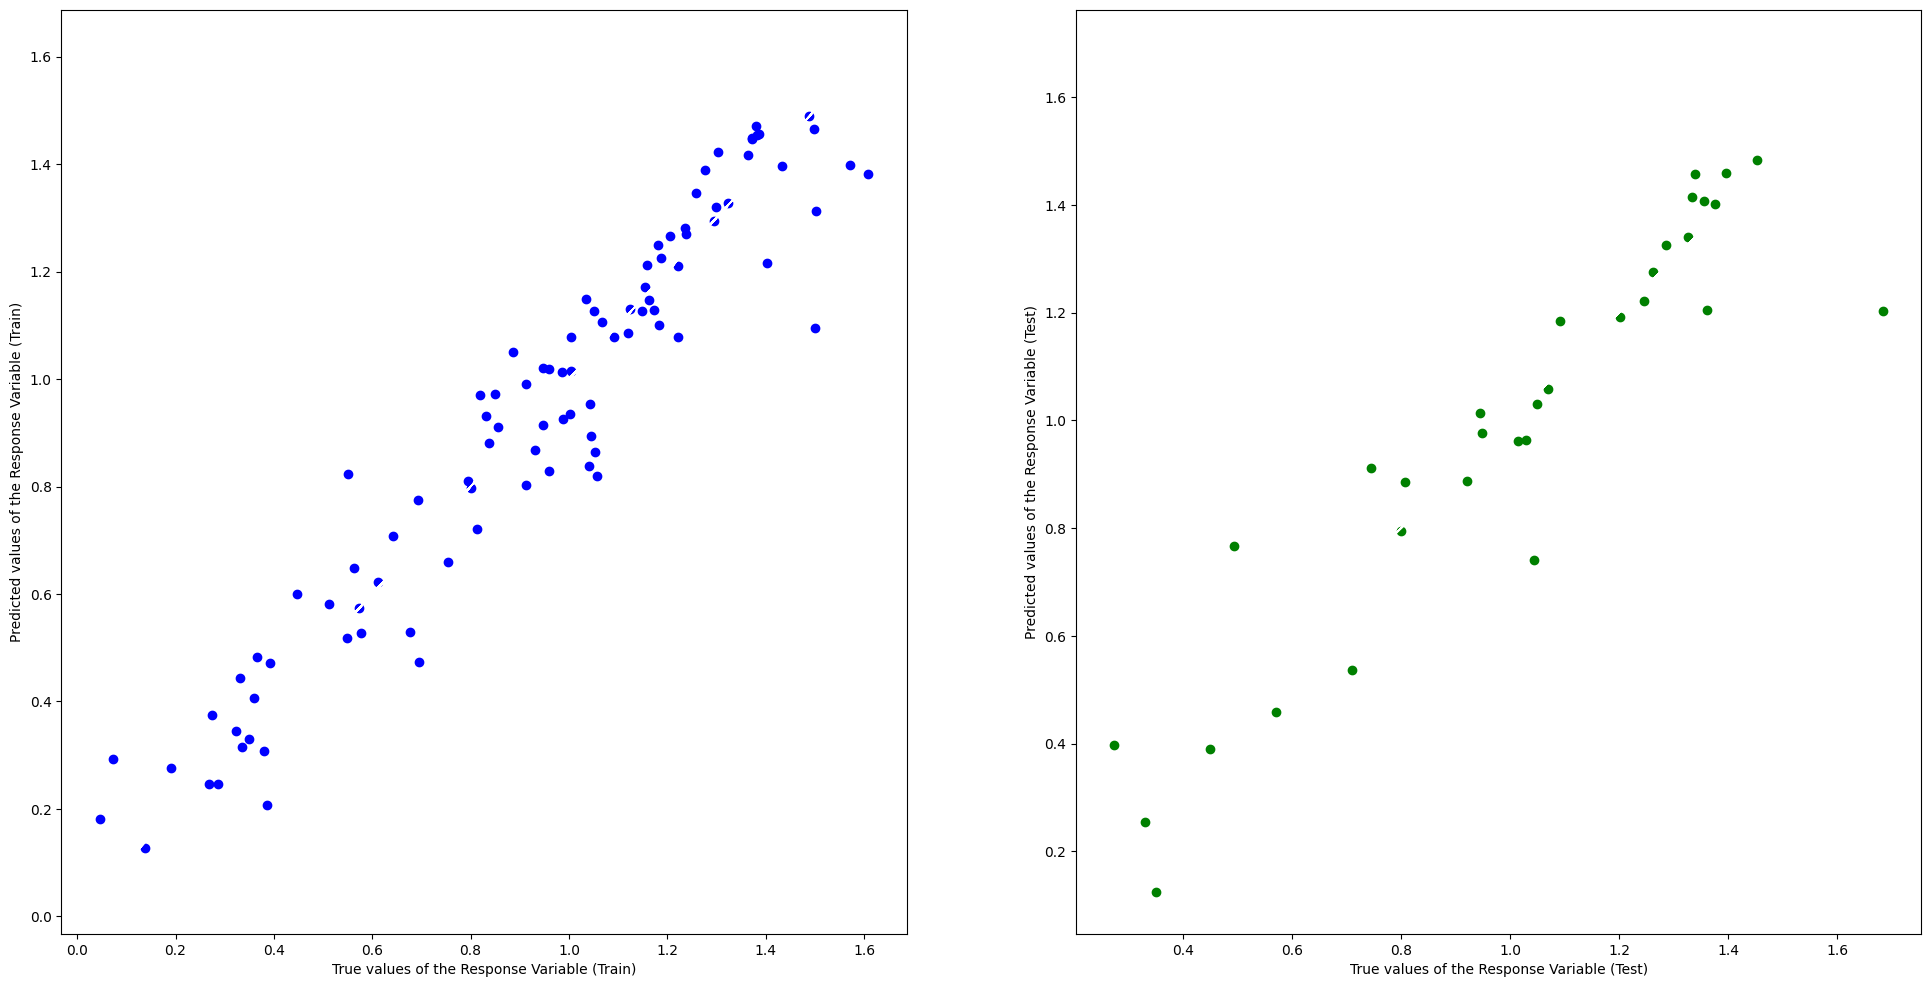

In [1574]:
# Predict the Total values from Predictors
y_train_pred2019 = linreg.predict(X_train2019)
y_test_pred2019 = linreg.predict(X_test2019)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train2019, y_train_pred2019, color = "blue")
axes[0].plot(y_train2019,y_train2019, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test2019, y_test_pred2019, color = "green")
axes[1].plot(y_test2019, y_test2019, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


## **Goodness of Fit (2019 data)**

In [1575]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train2019, y_train2019))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train2019, y_train_pred2019))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test2019, y_test2019))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test2019, y_test_pred2019))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9203819761644484
Mean Squared Error (MSE) 	: 0.012056535075113044

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8506223466543177
Mean Squared Error (MSE) 	: 0.01965168936184647

